In [68]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
sns.set_style('darkgrid')
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

In [69]:
#reading dataset
dataframe1=pd.read_csv('Part2 - Data1.csv')
dataframe2=pd.read_csv('Part2 -Data2.csv')

In [70]:
dataframe1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [71]:
dataframe2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [72]:
dataframe1.shape,dataframe2.shape

((5000, 8), (5000, 7))

In [73]:
#merge 2 dataset
dataframe_merge = pd.concat([dataframe1, dataframe2], axis =1)
dataframe_merge.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,2,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,3,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,4,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,5,0,0,0,0,1,NaN


In [74]:
dataframe_merge.shape

(5000, 15)

In [75]:
dataframe_merge.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'ID', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [76]:
dataframe_merge.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [77]:
col=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in col:
    dataframe_merge[i]=dataframe_merge[i].astype('category')

In [78]:
dataframe_merge.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
ID                      0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [79]:
dataframe_merge.dropna(axis=0,inplace=True)

In [80]:
dataframe_merge.replace(0.0,0)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,10,0,0,0,0,0,1.0
10,11,65,39,105,94710,4,2.4,3,11,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,12,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,13,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,14,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,4996,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,4997,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,4998,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,4999,0,0,0,1,0,0.0


In [81]:
dataframe_merge.isnull().sum().any()

False

In [82]:
dataframe_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   4980 non-null   int64   
 1   Age                  4980 non-null   int64   
 2   CustomerSince        4980 non-null   int64   
 3   HighestSpend         4980 non-null   int64   
 4   ZipCode              4980 non-null   int64   
 5   HiddenScore          4980 non-null   category
 6   MonthlyAverageSpend  4980 non-null   float64 
 7   Level                4980 non-null   category
 8   ID                   4980 non-null   int64   
 9   Mortgage             4980 non-null   int64   
 10  Security             4980 non-null   category
 11  FixedDepositAccount  4980 non-null   category
 12  InternetBanking      4980 non-null   category
 13  CreditCard           4980 non-null   category
 14  LoanOnCard           4980 non-null   category
dtypes: category(7), float

In [83]:
dataframe_merge.drop('ID',axis=1,inplace=True)

In [84]:
dataframe_merge = dataframe_merge.sample(frac = 1)

In [85]:
dataframe_merge.reset_index(inplace = True)
dataframe_merge.head()

,index,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1395,47,23,190,92831,4,0.3,3,305,0,0,0,0,1.0
1,232,46,19,38,94122,3,2.5,2,135,0,0,0,0,0.0
2,2918,28,3,142,93727,1,0.8,1,0,0,0,1,0,0.0
3,1814,48,22,79,95747,3,0.7,2,0,0,0,1,0,0.0
4,815,62,38,35,94596,1,1.9,2,118,0,0,0,0,0.0


In [86]:
dataframe_merge.describe()

,index,Age,CustomerSince,HighestSpend,ZipCode,MonthlyAverageSpend,Mortgage
count,4980.000000,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000
mean,2509.345382,45.352610,20.117671,73.85241,93152.420482,1.939536,56.589759
std,1438.011129,11.464212,11.468716,46.07009,2123.660073,1.750006,101.836758
min,9.000000,23.000000,-3.000000,8.00000,9307.000000,0.000000,0.000000
25%,1264.750000,35.000000,10.000000,39.00000,91911.000000,0.700000,0.000000
50%,2509.500000,45.000000,20.000000,64.00000,93407.000000,1.500000,0.000000
75%,3754.250000,55.000000,30.000000,98.00000,94608.000000,2.525000,101.000000
max,4999.000000,67.000000,43.000000,224.00000,96651.000000,10.000000,635.000000


**univariate analysis**

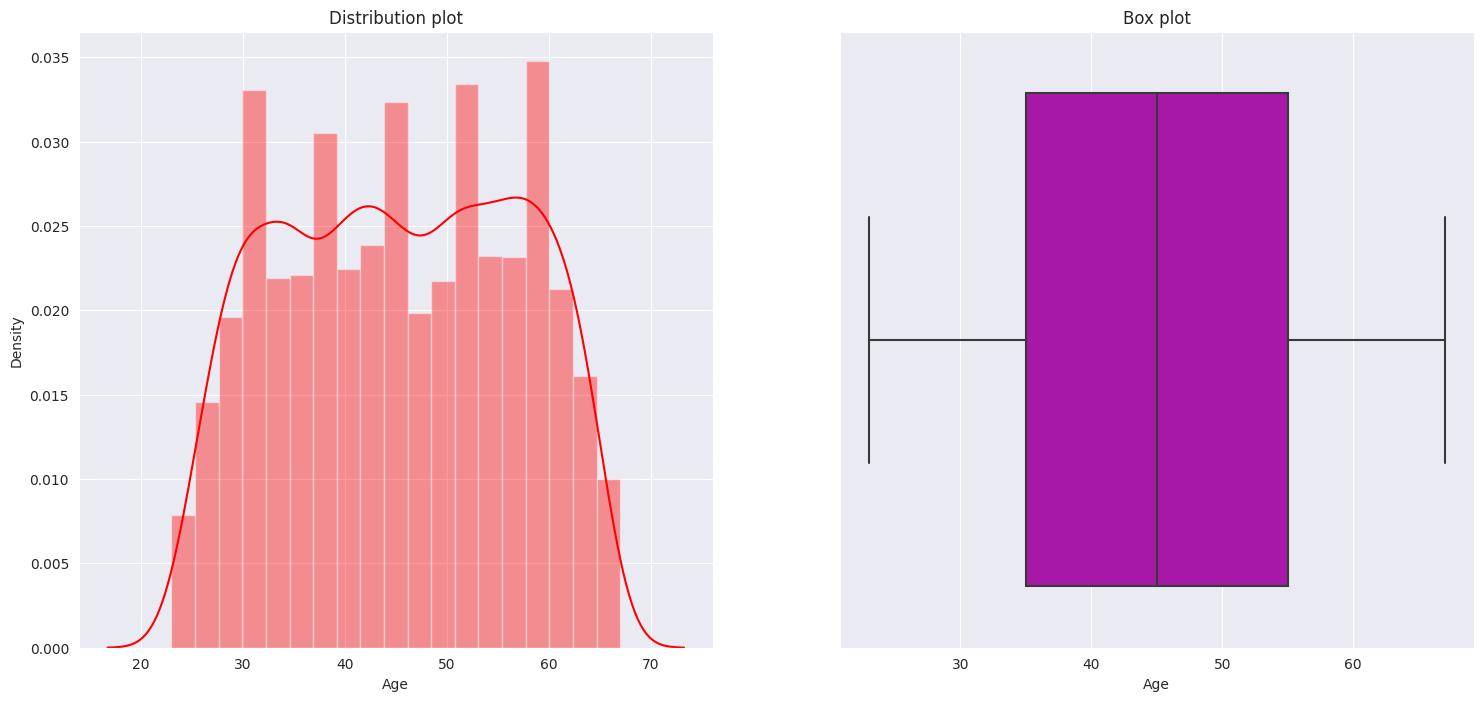

 Total Number of outliers in Age: 0


In [87]:
#Distribution and outlier analysis of numerical variables
#Age
f, axes = plt.subplots(1, 2, figsize=(18,8))
sns.boxplot(x = 'Age', data=dataframe_merge,  orient='h' , color = 'm', ax=axes[1])
sns.distplot(dataframe_merge['Age'], color = 'r', ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking the count of outliers.
Q25,Q75=np.percentile(dataframe_merge['Age'],25),np.percentile(dataframe_merge['Age'],75)
IQR=Q75-Q25
Threshold=IQR*1.5
lower,upper=Q25-Threshold,Q75+Threshold
Outliers=[i for i in dataframe_merge['Age'] if i < lower or i > upper]
print('{} Total Number of outliers in Age: {}'.format('\033[1m',len(Outliers)))
#There is normality maintained in age column. Center area is little wider.
#People with age between 35 to 65 are more
#We have no outliers in this column

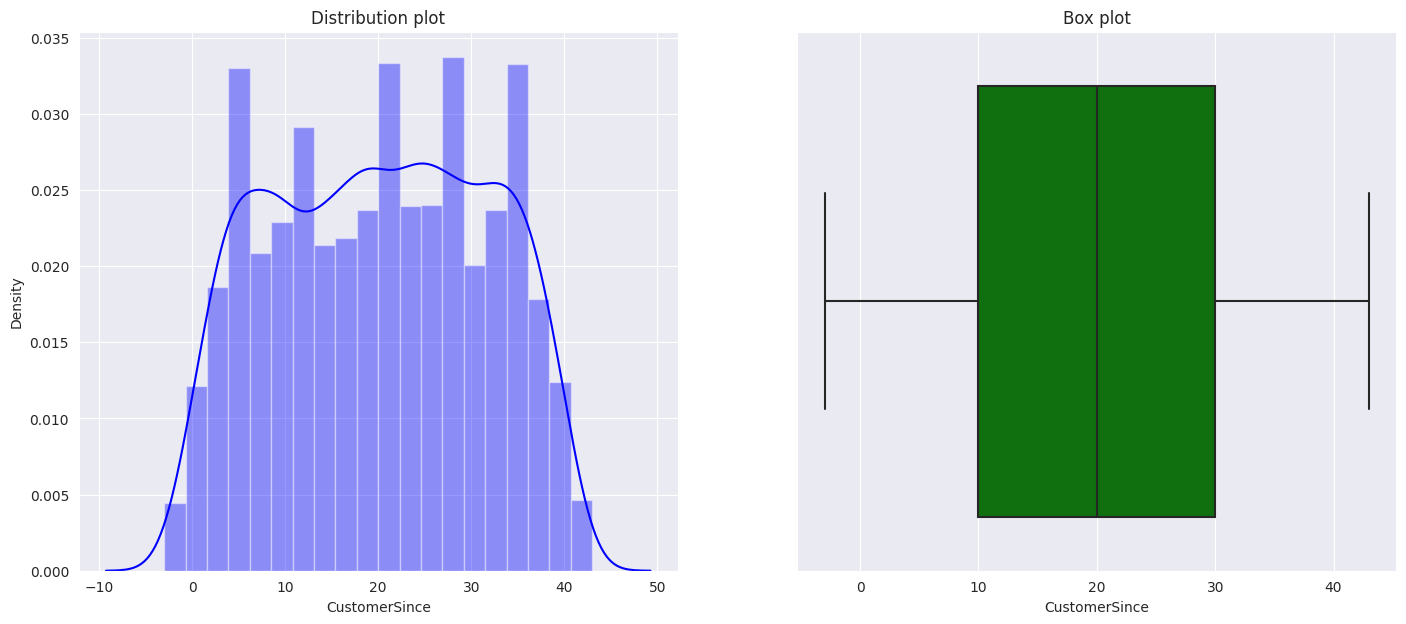

 Total Number of outliers in CustomerSince: 0


In [88]:
#CustomerSince
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'CustomerSince', data=dataframe_merge,  color = 'g', orient='h' , ax=axes[1])
sns.distplot(dataframe_merge['CustomerSince'], color = 'b', ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(dataframe_merge['CustomerSince'],25),np.percentile(dataframe_merge['CustomerSince'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dataframe_merge['CustomerSince'] if i < lower or i > upper]
print('{} Total Number of outliers in CustomerSince: {}'.format('\033[1m',len(Outliers)))
#Most of the people became customer of bank between 10 to 30. Here the units are masked
#We have no outliers

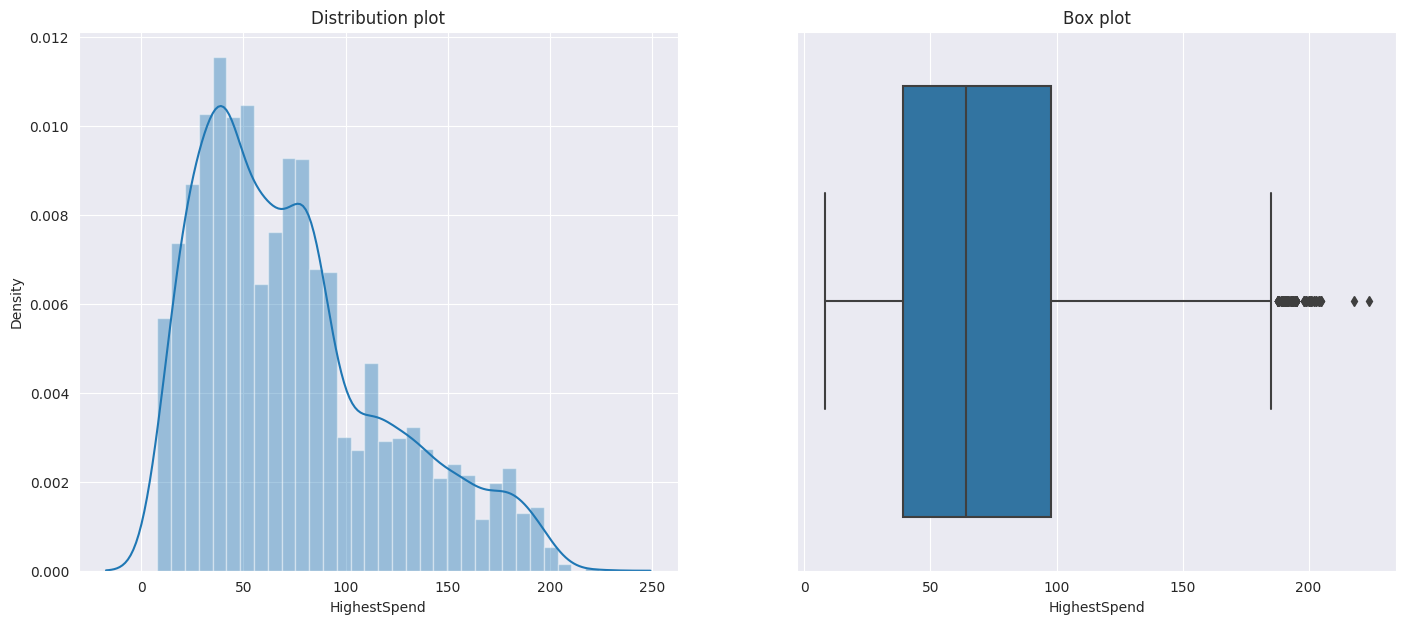

 Total Number of outliers in HighestSpend: 96


In [89]:
#HighestSpend
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'HighestSpend', data=dataframe_merge,  orient='h' , ax=axes[1])
sns.distplot(dataframe_merge['HighestSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(dataframe_merge['HighestSpend'],25),np.percentile(dataframe_merge['HighestSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dataframe_merge['HighestSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in HighestSpend: {}'.format('\033[1m',len(Outliers)))
#We can see positive skewness in the data
#In one transaction highest spend amount is between 45 to 100. Here the units are masked
#We can see 96 Outliers. Few customers spent more than 200 as well

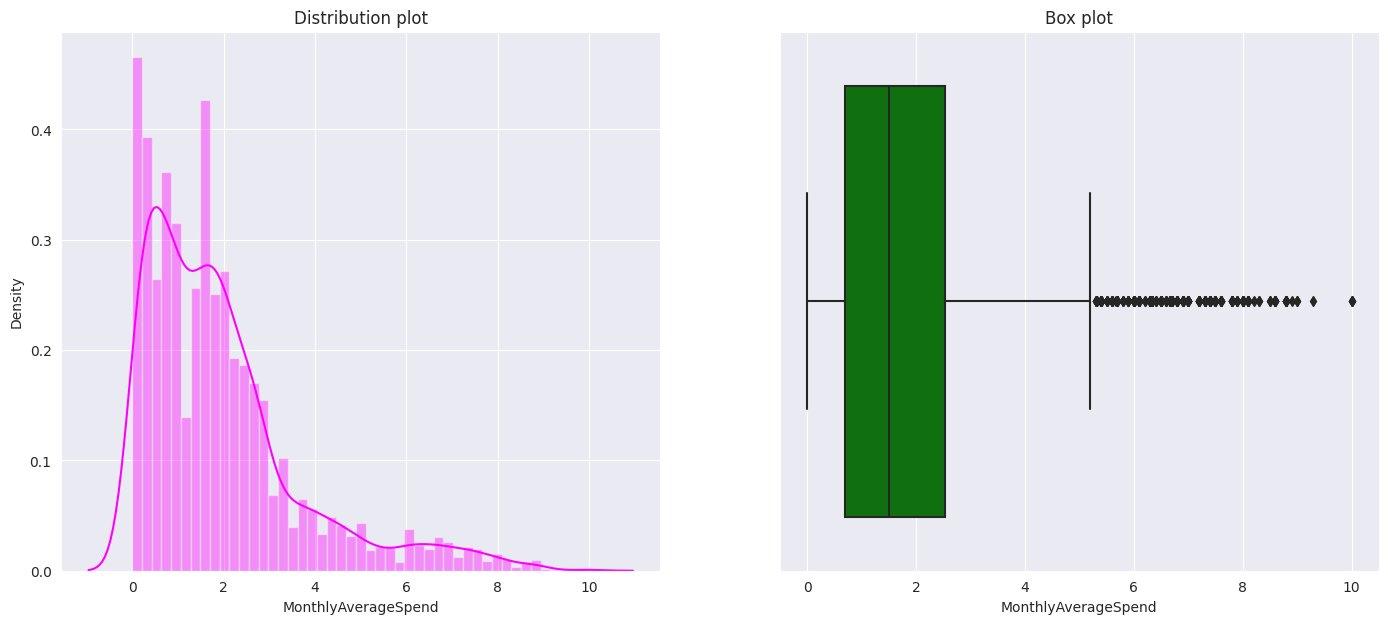

 Total Number of outliers in MonthlyAverageSpend: 324


In [90]:
#MonthlyAverageSpend
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'MonthlyAverageSpend', data=dataframe_merge,  color = 'g', orient='h' , ax=axes[1])
sns.distplot(dataframe_merge['MonthlyAverageSpend'], color = 'magenta', ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(dataframe_merge['MonthlyAverageSpend'],25),np.percentile(dataframe_merge['MonthlyAverageSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dataframe_merge['MonthlyAverageSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in MonthlyAverageSpend: {}'.format('\033[1m',len(Outliers)))
#We can see huge positive skewness in the data
#Monthly average spend of the customer are mostly between 1 to 3(Units are masked)
#There is more number of outliers.This tells some customers spent huge amount as well

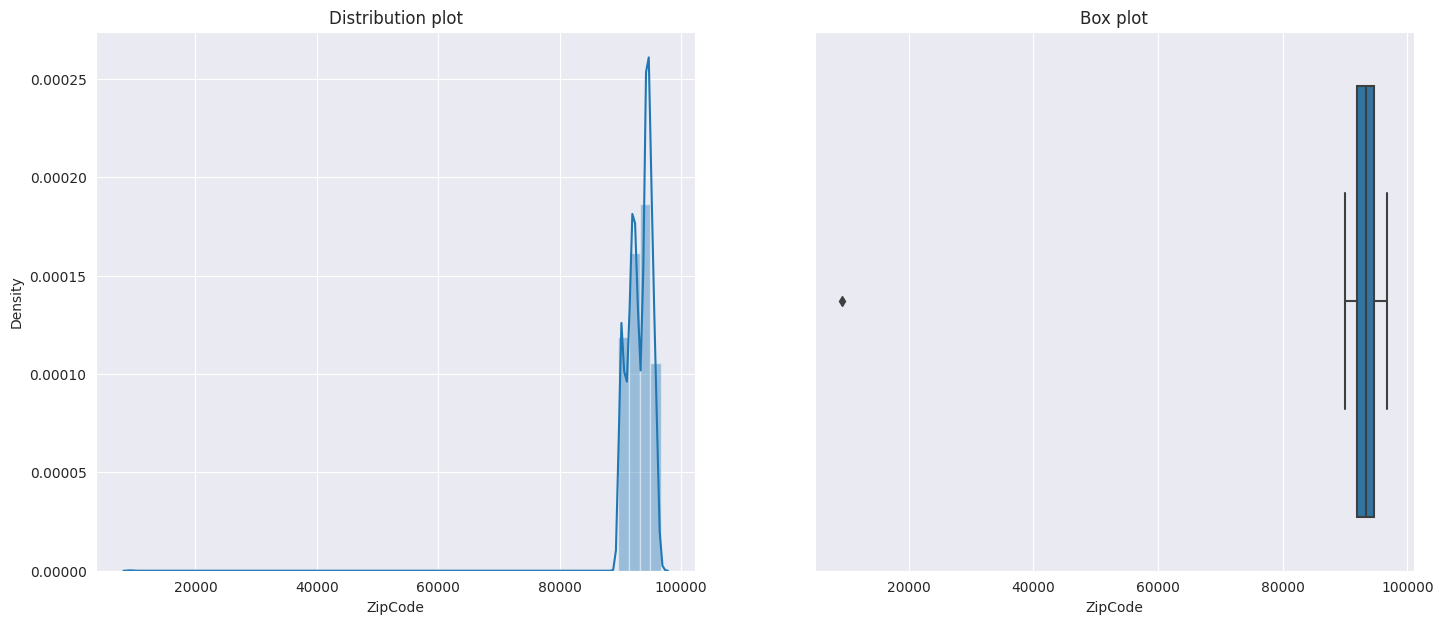

 Total Number of outliers in ZipCode: 1


In [91]:
#ZipCode
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'ZipCode', data=dataframe_merge,  orient='h' , ax=axes[1])
sns.distplot(dataframe_merge['ZipCode'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(dataframe_merge['ZipCode'],25),np.percentile(dataframe_merge['ZipCode'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dataframe_merge['ZipCode'] if i < lower or i > upper]
print('{} Total Number of outliers in ZipCode: {}'.format('\033[1m',len(Outliers)))
#We can see huge positive skewness in the data
#Monthly average spend of the customer are mostly between 1 to 3(Units are masked)
#There is more number of outliers.This tells some customers spent huge amount as well
#Most of the zipcodes are appeared once.
#There is no proper distribution
#This column does not add value to the model. We will drop during model building

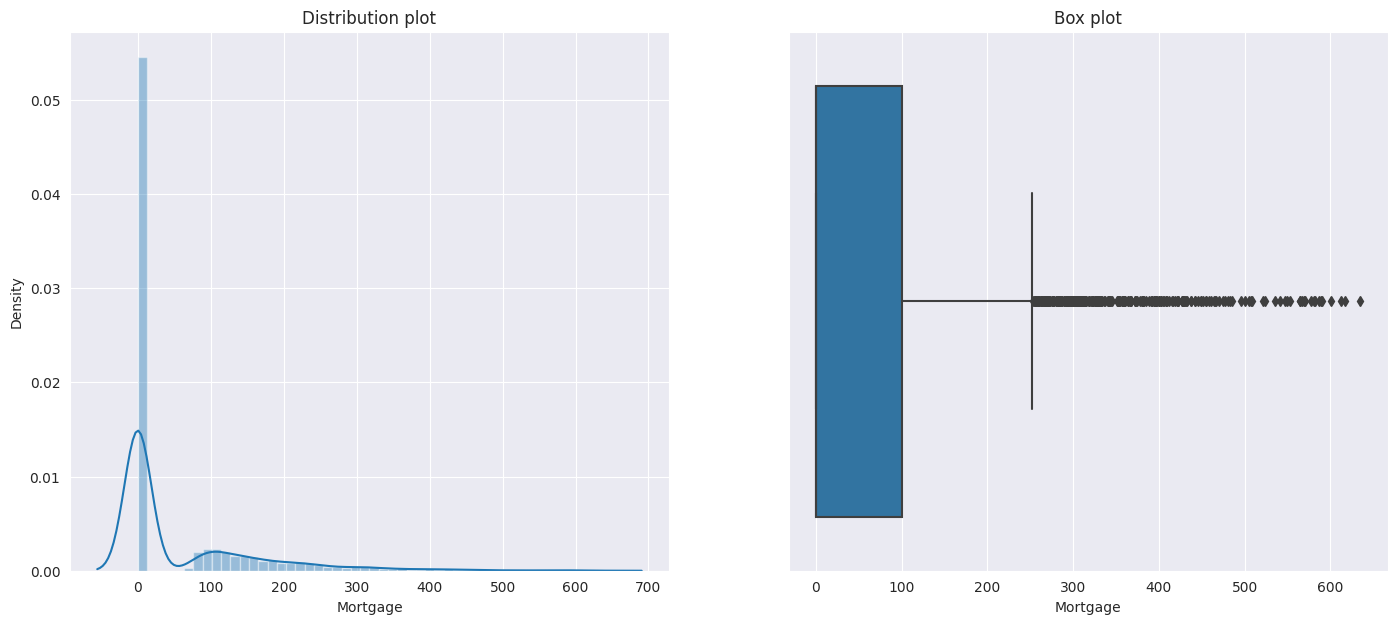

 Total Number of outliers in Mortgage: 291


In [92]:
#Mortage
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Mortgage', data=dataframe_merge,  orient='h' , ax=axes[1])
sns.distplot(dataframe_merge['Mortgage'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()
#checking count of outliers.
q25,q75=np.percentile(dataframe_merge['Mortgage'],25),np.percentile(dataframe_merge['Mortgage'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dataframe_merge['Mortgage'] if i < lower or i > upper]
print('{} Total Number of outliers in Mortgage: {}'.format('\033[1m',len(Outliers)))
#Most of cases we have zero as value this tell most of the cutomer doest have mortage.
#we can see there is no proper distribution.

<Figure size 1000x500 with 0 Axes>

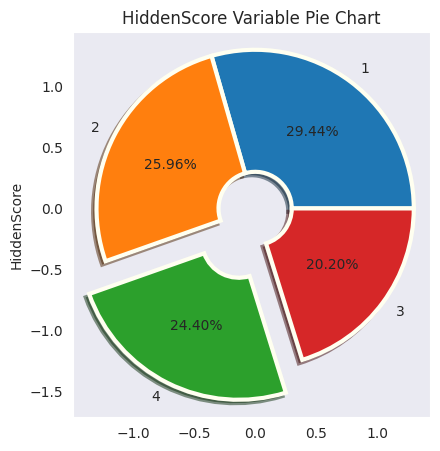

<Figure size 1000x500 with 0 Axes>

In [93]:
# HiddenScore
explode = [0,0,0.3,0]
wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"ivory"} # Width = 1
plt.subplots(figsize =(10, 5))
dataframe_merge['HiddenScore'].value_counts().plot.pie(autopct='%0.2f%%', shadow=True, radius = 1.3, 
                                                 frame = True, wedgeprops = wedgeprops,
                                                 explode = explode
                                                 )
plt.title('HiddenScore Variable Pie Chart')
plt.figure(figsize = (10,5))

Text(0.5, 1.0, 'Level Variable Pie Chart')

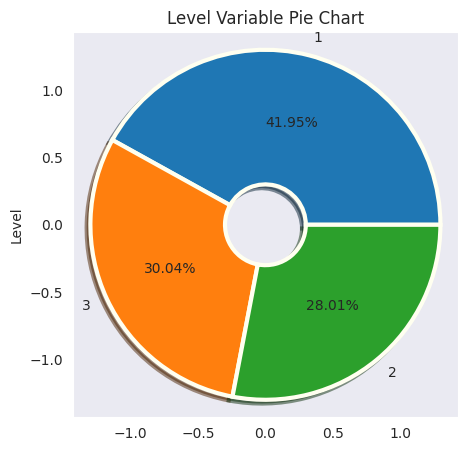

In [94]:
# Level
wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"ivory"} # Width = 1
plt.subplots(figsize =(10, 5))
dataframe_merge['Level'].value_counts().plot.pie(autopct='%0.2f%%', shadow=True, radius = 1.3, 
                                                 frame = True, wedgeprops = wedgeprops
                                                 )
plt.title('Level Variable Pie Chart')
#Level 2 and 3 has nearly equal distribution
#Level 1 customers are more compared to others

<Figure size 1000x500 with 0 Axes>

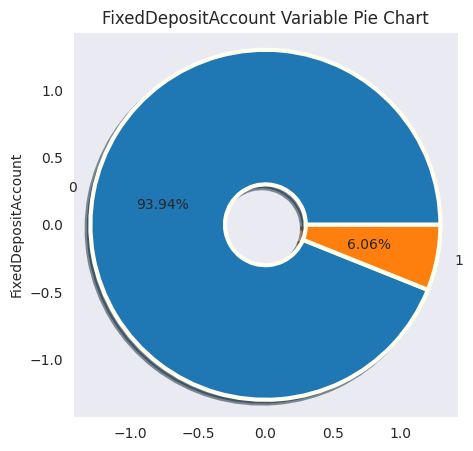

<Figure size 1000x500 with 0 Axes>

In [95]:
# Fixed Deposit Account
wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"ivory"} # Width = 1
plt.subplots(figsize =(10, 5))
dataframe_merge['FixedDepositAccount'].value_counts().plot.pie(autopct='%0.2f%%', shadow=True, radius = 1.3, 
                                                 frame = True, wedgeprops = wedgeprops
                                                 )
plt.title('FixedDepositAccount Variable Pie Chart')
plt.figure(figsize = (10,5))
#We can see 93.9% of customers does not have fixed deposit account

<Figure size 1000x500 with 0 Axes>

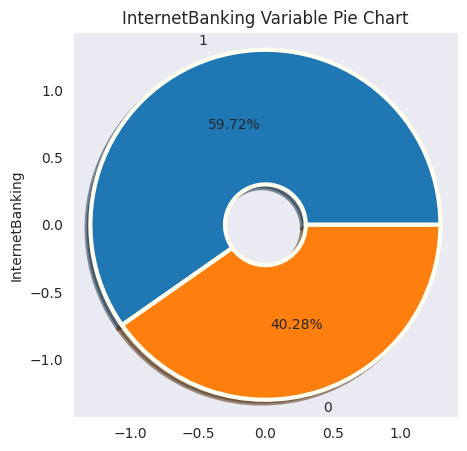

<Figure size 1000x500 with 0 Axes>

In [96]:
# InternetBanking
wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"ivory"} # Width = 1
plt.subplots(figsize =(10, 5))
dataframe_merge['InternetBanking'].value_counts().plot.pie(autopct='%0.2f%%', shadow=True, radius = 1.3, 
                                                 frame = True, wedgeprops = wedgeprops
                                                 )
plt.title('InternetBanking Variable Pie Chart')
plt.figure(figsize = (10,5))

<Figure size 1000x500 with 0 Axes>

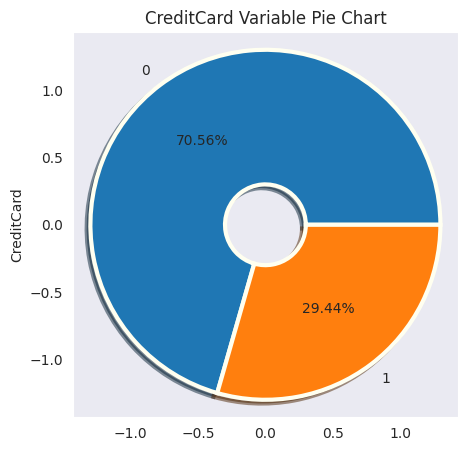

<Figure size 1000x500 with 0 Axes>

In [97]:
# CreditCard
wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"ivory"} # Width = 1
plt.subplots(figsize =(10, 5))
dataframe_merge['CreditCard'].value_counts().plot.pie(autopct='%0.2f%%', shadow=True, radius = 1.3, 
                                                 frame = True, wedgeprops = wedgeprops
                                                 )
plt.title('CreditCard Variable Pie Chart')
plt.figure(figsize = (10,5))

<Figure size 1000x500 with 0 Axes>

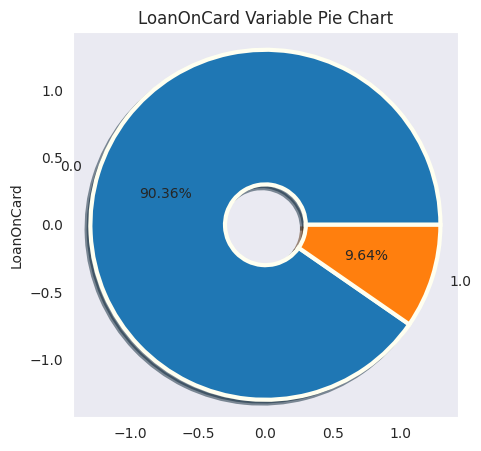

<Figure size 1000x500 with 0 Axes>

In [98]:
# LoanOnCard
wedgeprops = {"linewidth": 3, 'width':1, "edgecolor":"ivory"} # Width = 1
plt.subplots(figsize =(10, 5))
dataframe_merge['LoanOnCard'].value_counts().plot.pie(autopct='%0.2f%%', shadow=True, radius = 1.3, 
                                                 frame = True, wedgeprops = wedgeprops
                                                 )
plt.title('LoanOnCard Variable Pie Chart')
plt.figure(figsize = (10,5))
#We can see 90% of people does not have loan on credit card

**Bi-variate analysis**

<Axes: xlabel='LoanOnCard', ylabel='CustomerSince'>

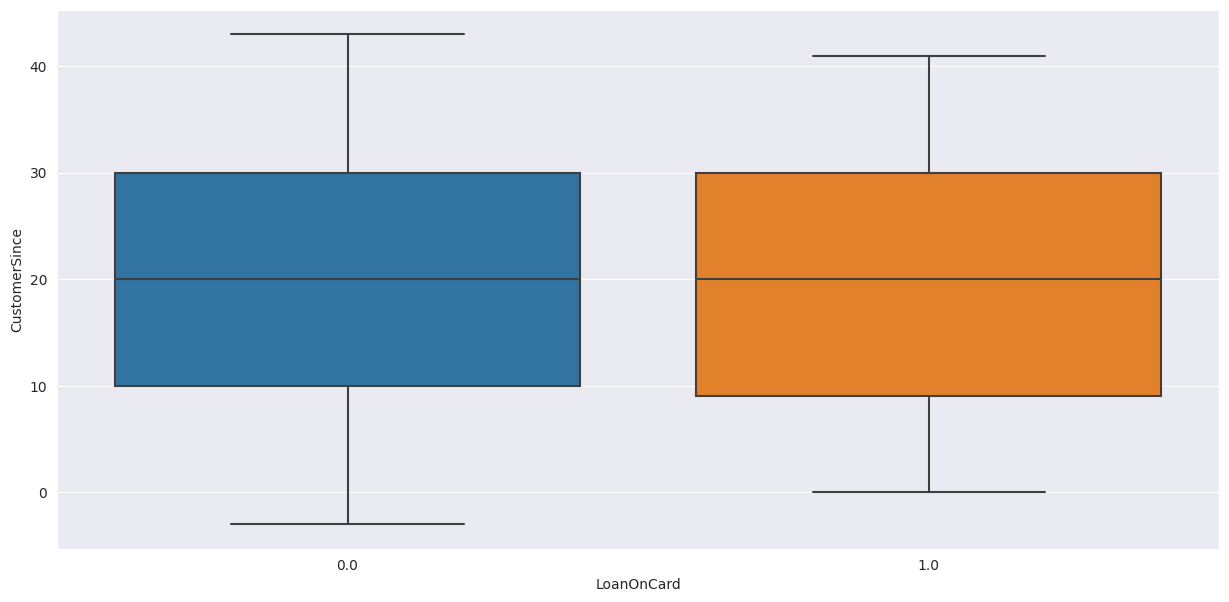

In [99]:
#Numerical vs Category
#LoanOnCard vs CustomerSince
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='CustomerSince', data= dataframe_merge)
#Customer of the bank since has equal distribution on loan holders and non-loan holders.

<Axes: xlabel='LoanOnCard'>

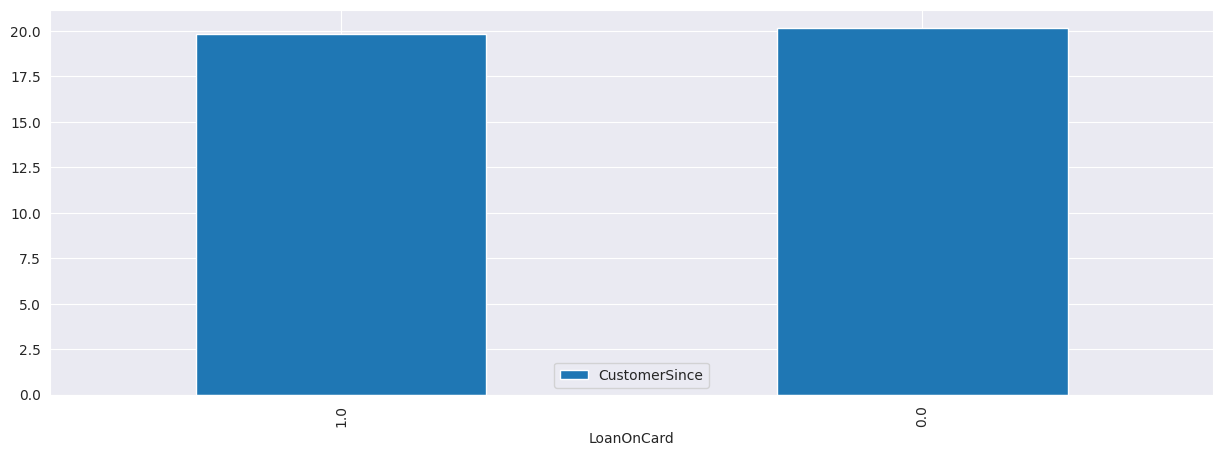

In [100]:
dataframe_merge.groupby(by=['LoanOnCard'])['CustomerSince'].mean().reset_index().sort_values(['CustomerSince']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='CustomerSince',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
#Mean values are nearly equal for both loan holders and non loan holders

<Axes: xlabel='LoanOnCard', ylabel='HighestSpend'>

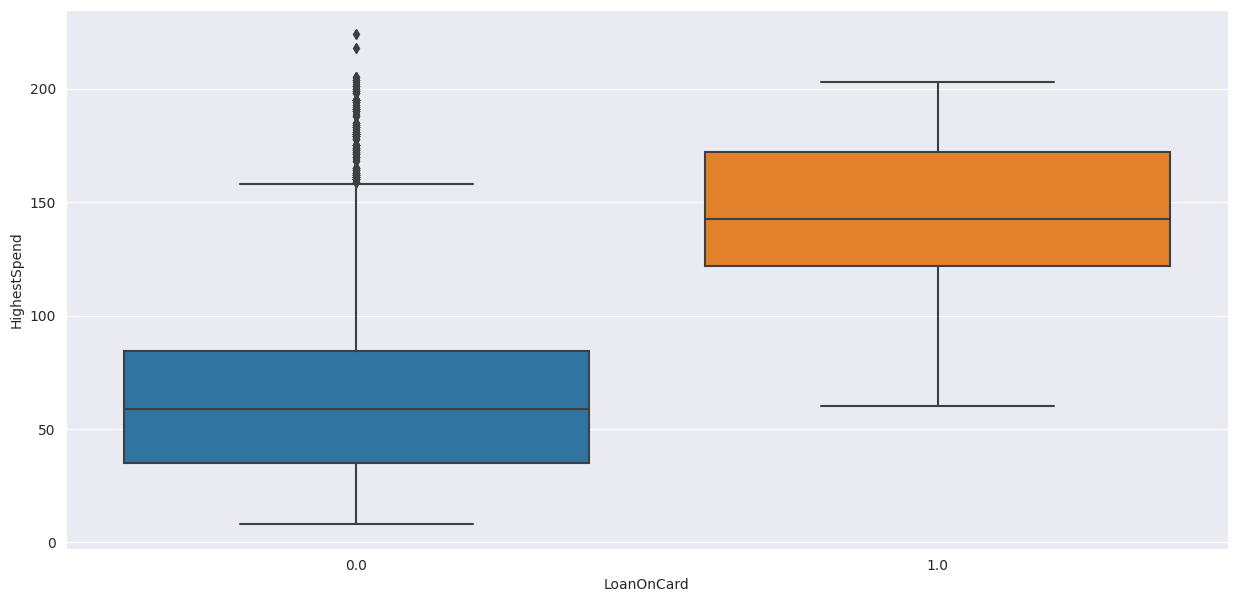

In [101]:
#HighestSpend vs LoanOnCard
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='HighestSpend', data= dataframe_merge)
#It is evident that people having loan on card spends more than who doesn't have
#Some customer who does not have loan also spends more sometimes.

<Axes: xlabel='LoanOnCard'>

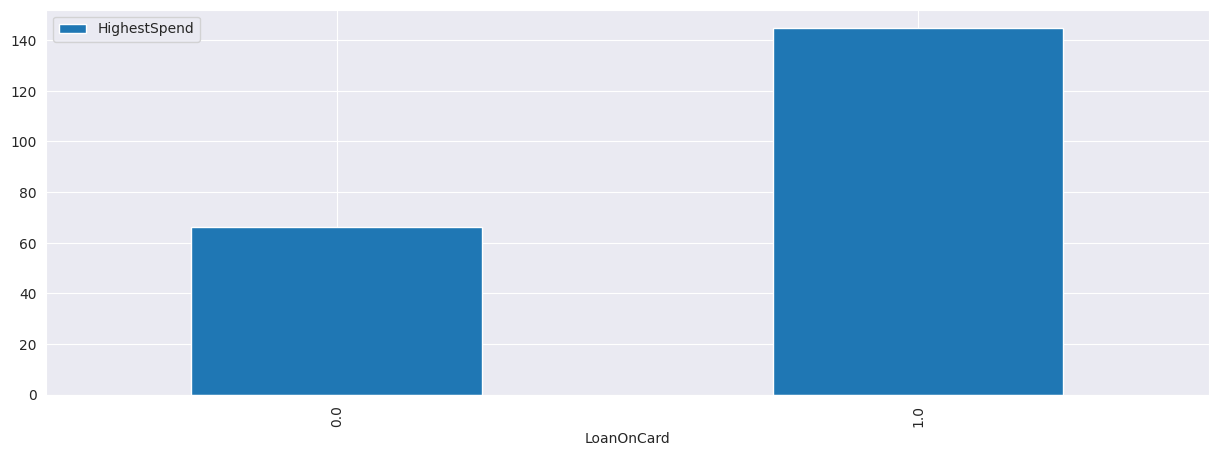

In [102]:
dataframe_merge.groupby(by=['LoanOnCard'])['HighestSpend'].mean().reset_index().sort_values(['HighestSpend']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='HighestSpend',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
#Mean value of highest spend is more for loan holders

<Axes: xlabel='LoanOnCard', ylabel='MonthlyAverageSpend'>

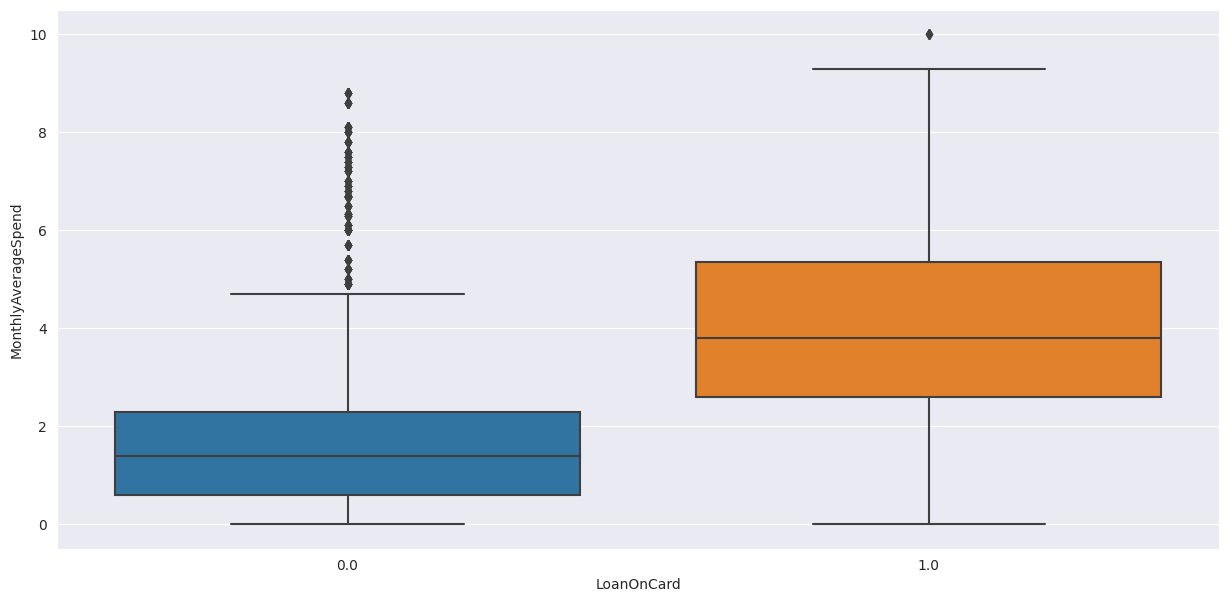

In [103]:
#MonthlyAverageSpend vs LoanOnCard
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='MonthlyAverageSpend', data= dataframe_merge)
#Monthly average spend is more for loan holders
#This column is directly proportional to highest spend

<Axes: xlabel='LoanOnCard'>

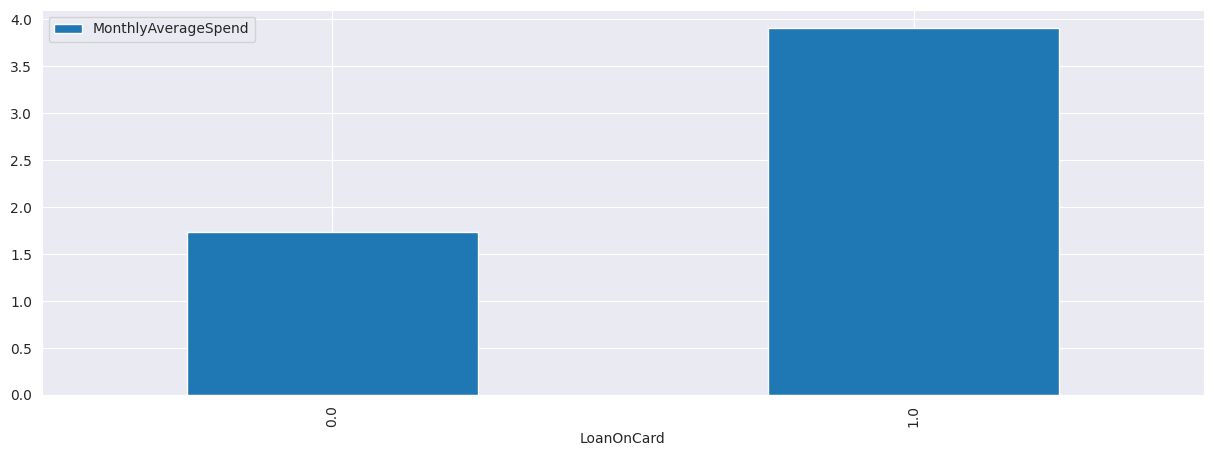

In [104]:
dataframe_merge.groupby(by=['LoanOnCard'])['MonthlyAverageSpend'].mean().reset_index().sort_values(['MonthlyAverageSpend']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='MonthlyAverageSpend',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
#Average spend mean values are more for loan holders.

<Axes: xlabel='LoanOnCard', ylabel='Mortgage'>

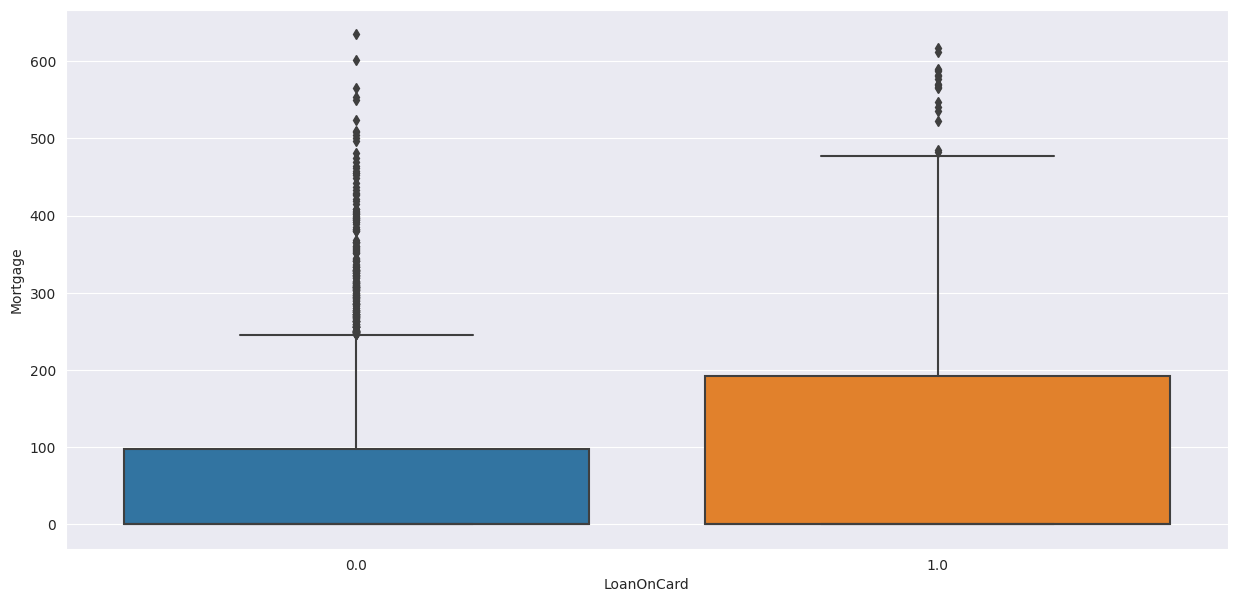

In [105]:
#Mortgage vs LoanOnCard
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Mortgage', data= dataframe_merge)
#Mortage value is high for loan holders
#We can see extreme value in both the cases

<Axes: xlabel='LoanOnCard'>

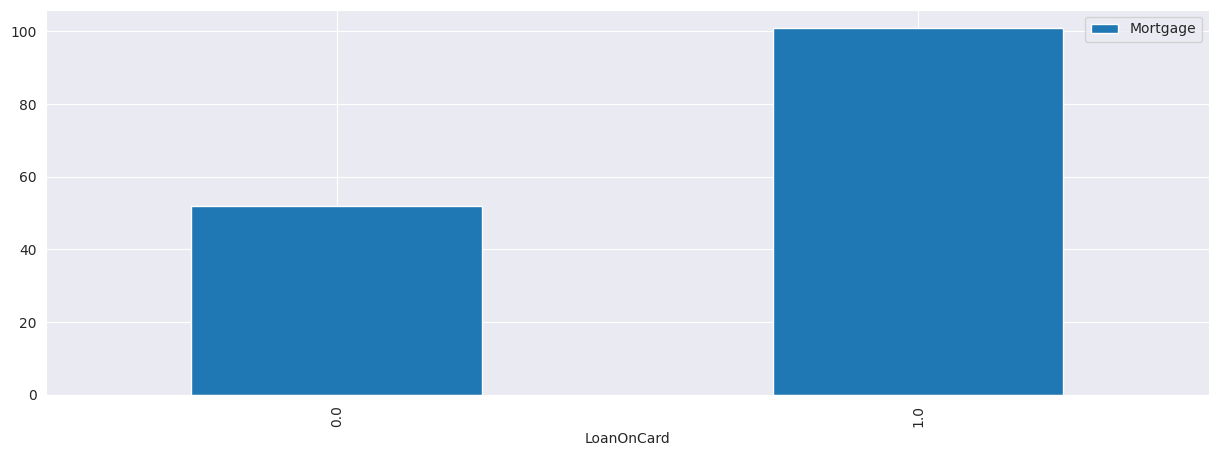

In [106]:
dataframe_merge.groupby(by=['LoanOnCard'])['Mortgage'].mean().reset_index().sort_values(['Mortgage']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Mortgage',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
#Mortgage Mean values are more for loan holders

<Axes: xlabel='LoanOnCard', ylabel='Age'>

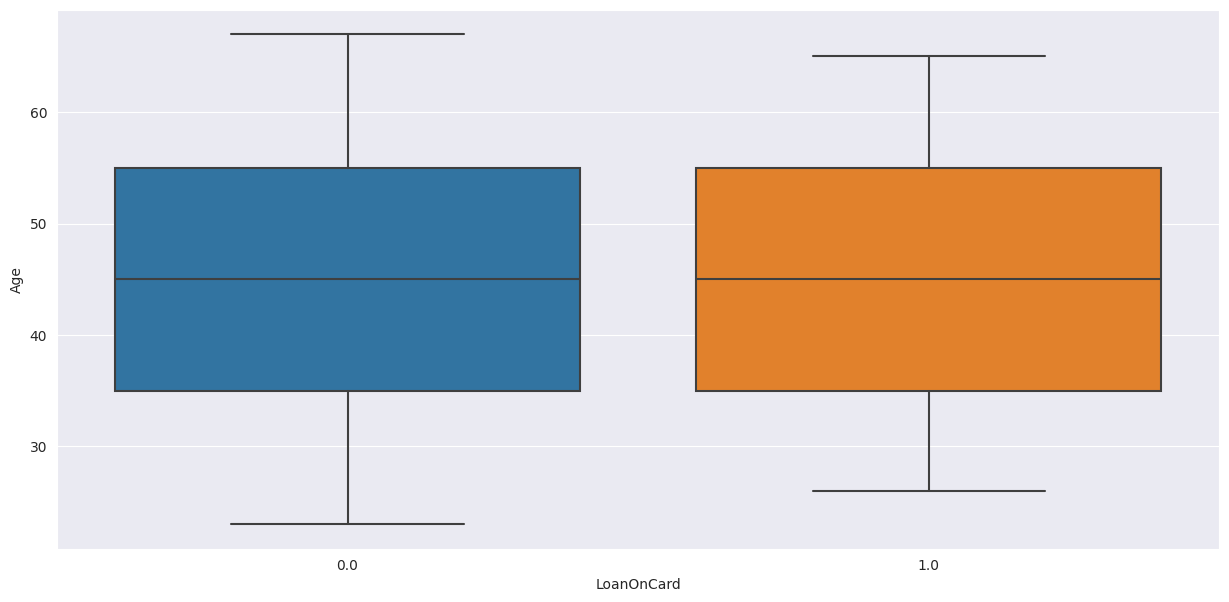

In [107]:
#Age vs LoanOnCard
plt.figure(figsize=(15,7))
sns.boxplot(x='LoanOnCard', y='Age', data= dataframe_merge)
#Age distribution is nearly equal for both loan holders and non-loan holders

<Axes: xlabel='LoanOnCard'>

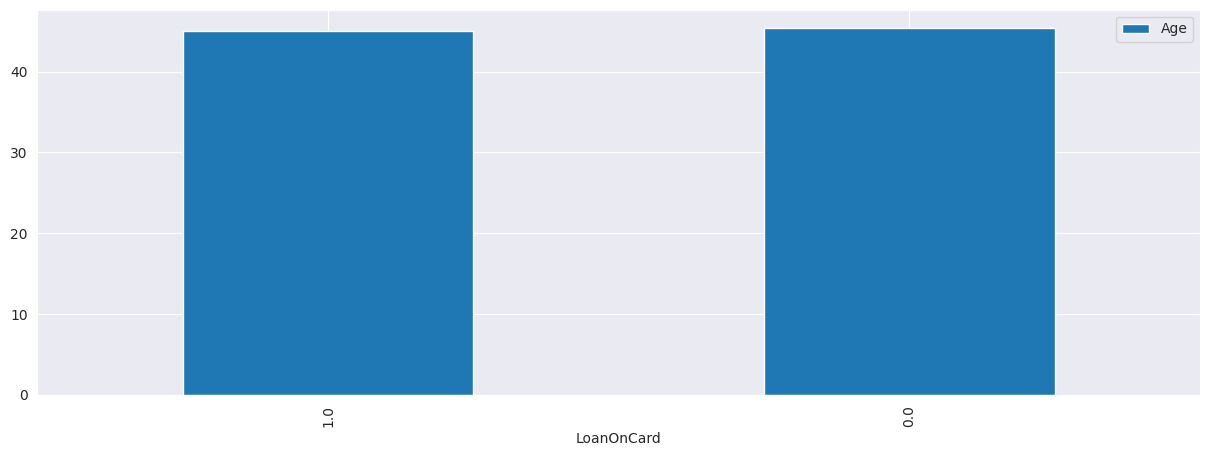

In [108]:
dataframe_merge.groupby(by=['LoanOnCard'])['Age'].mean().reset_index().sort_values(['Age']).tail(10).plot(x='LoanOnCard',
                                                                                                           y='Age',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
#Mean values are nearly equal so age is not affected for taking loans

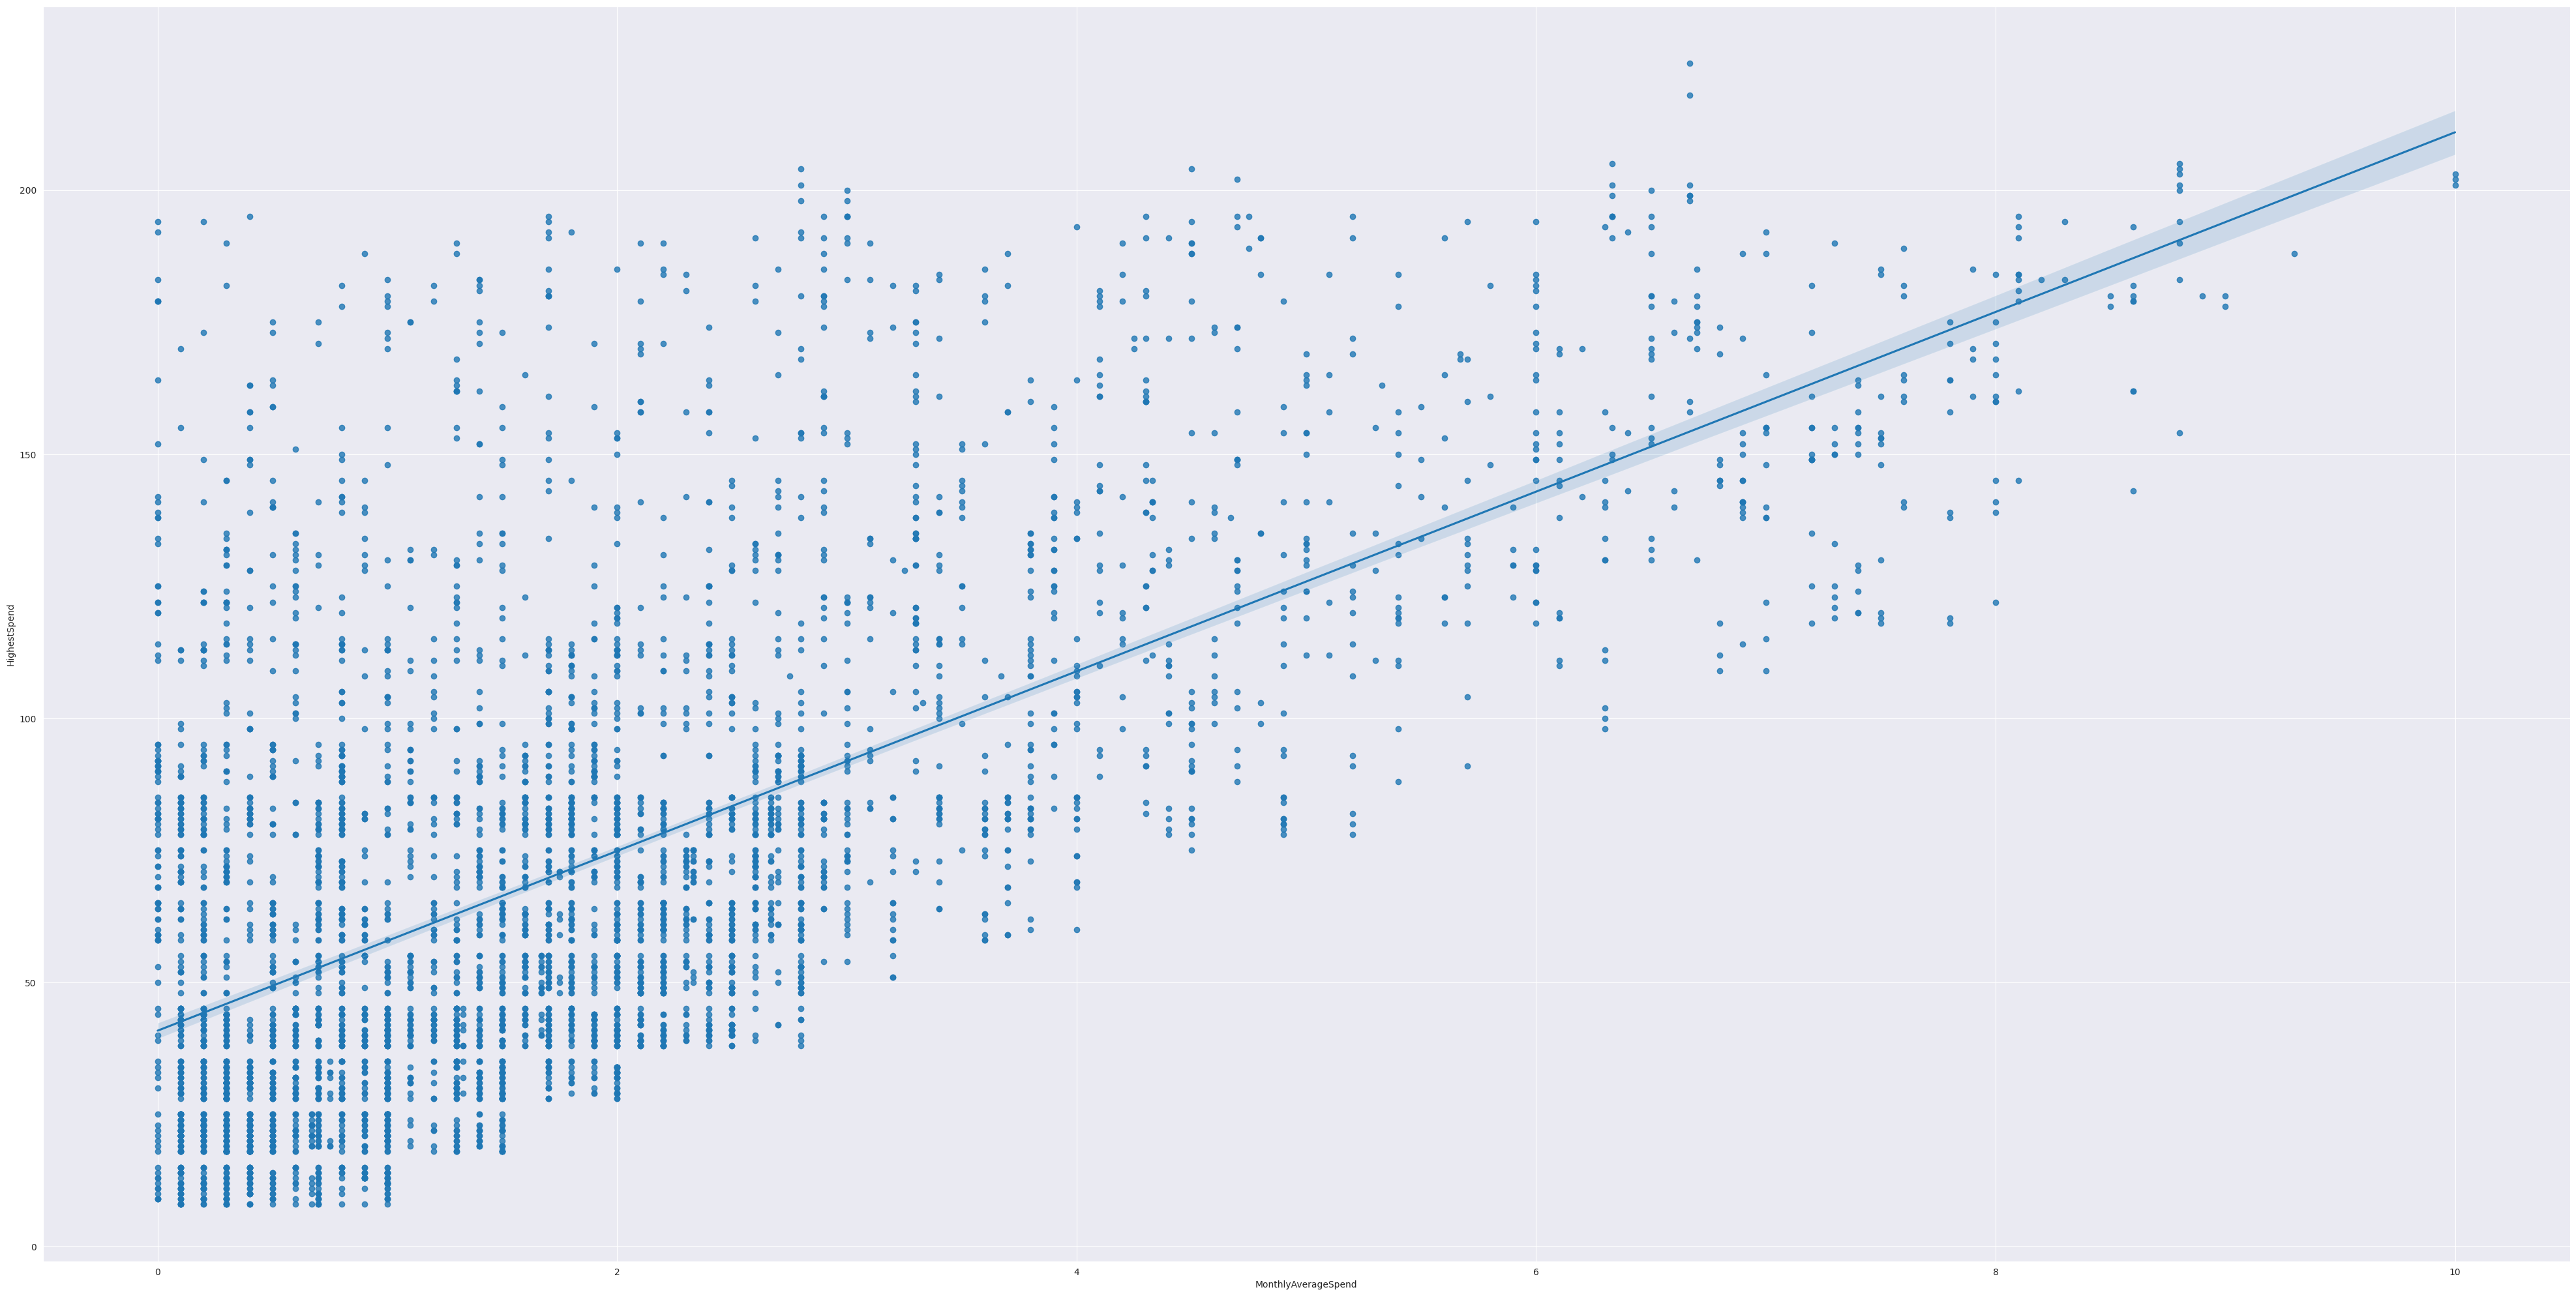

In [109]:
#Numerical vs Numerical

#MonthlyAverageSpend vs HighestSpend
figure = plt.figure(figsize=(50,25))

ax = sns.regplot(x='MonthlyAverageSpend',y='HighestSpend', data=dataframe_merge) # regression plot - scatter plot with a regression line
#There is clear linear relationship between Monthly average spend and highest spend.

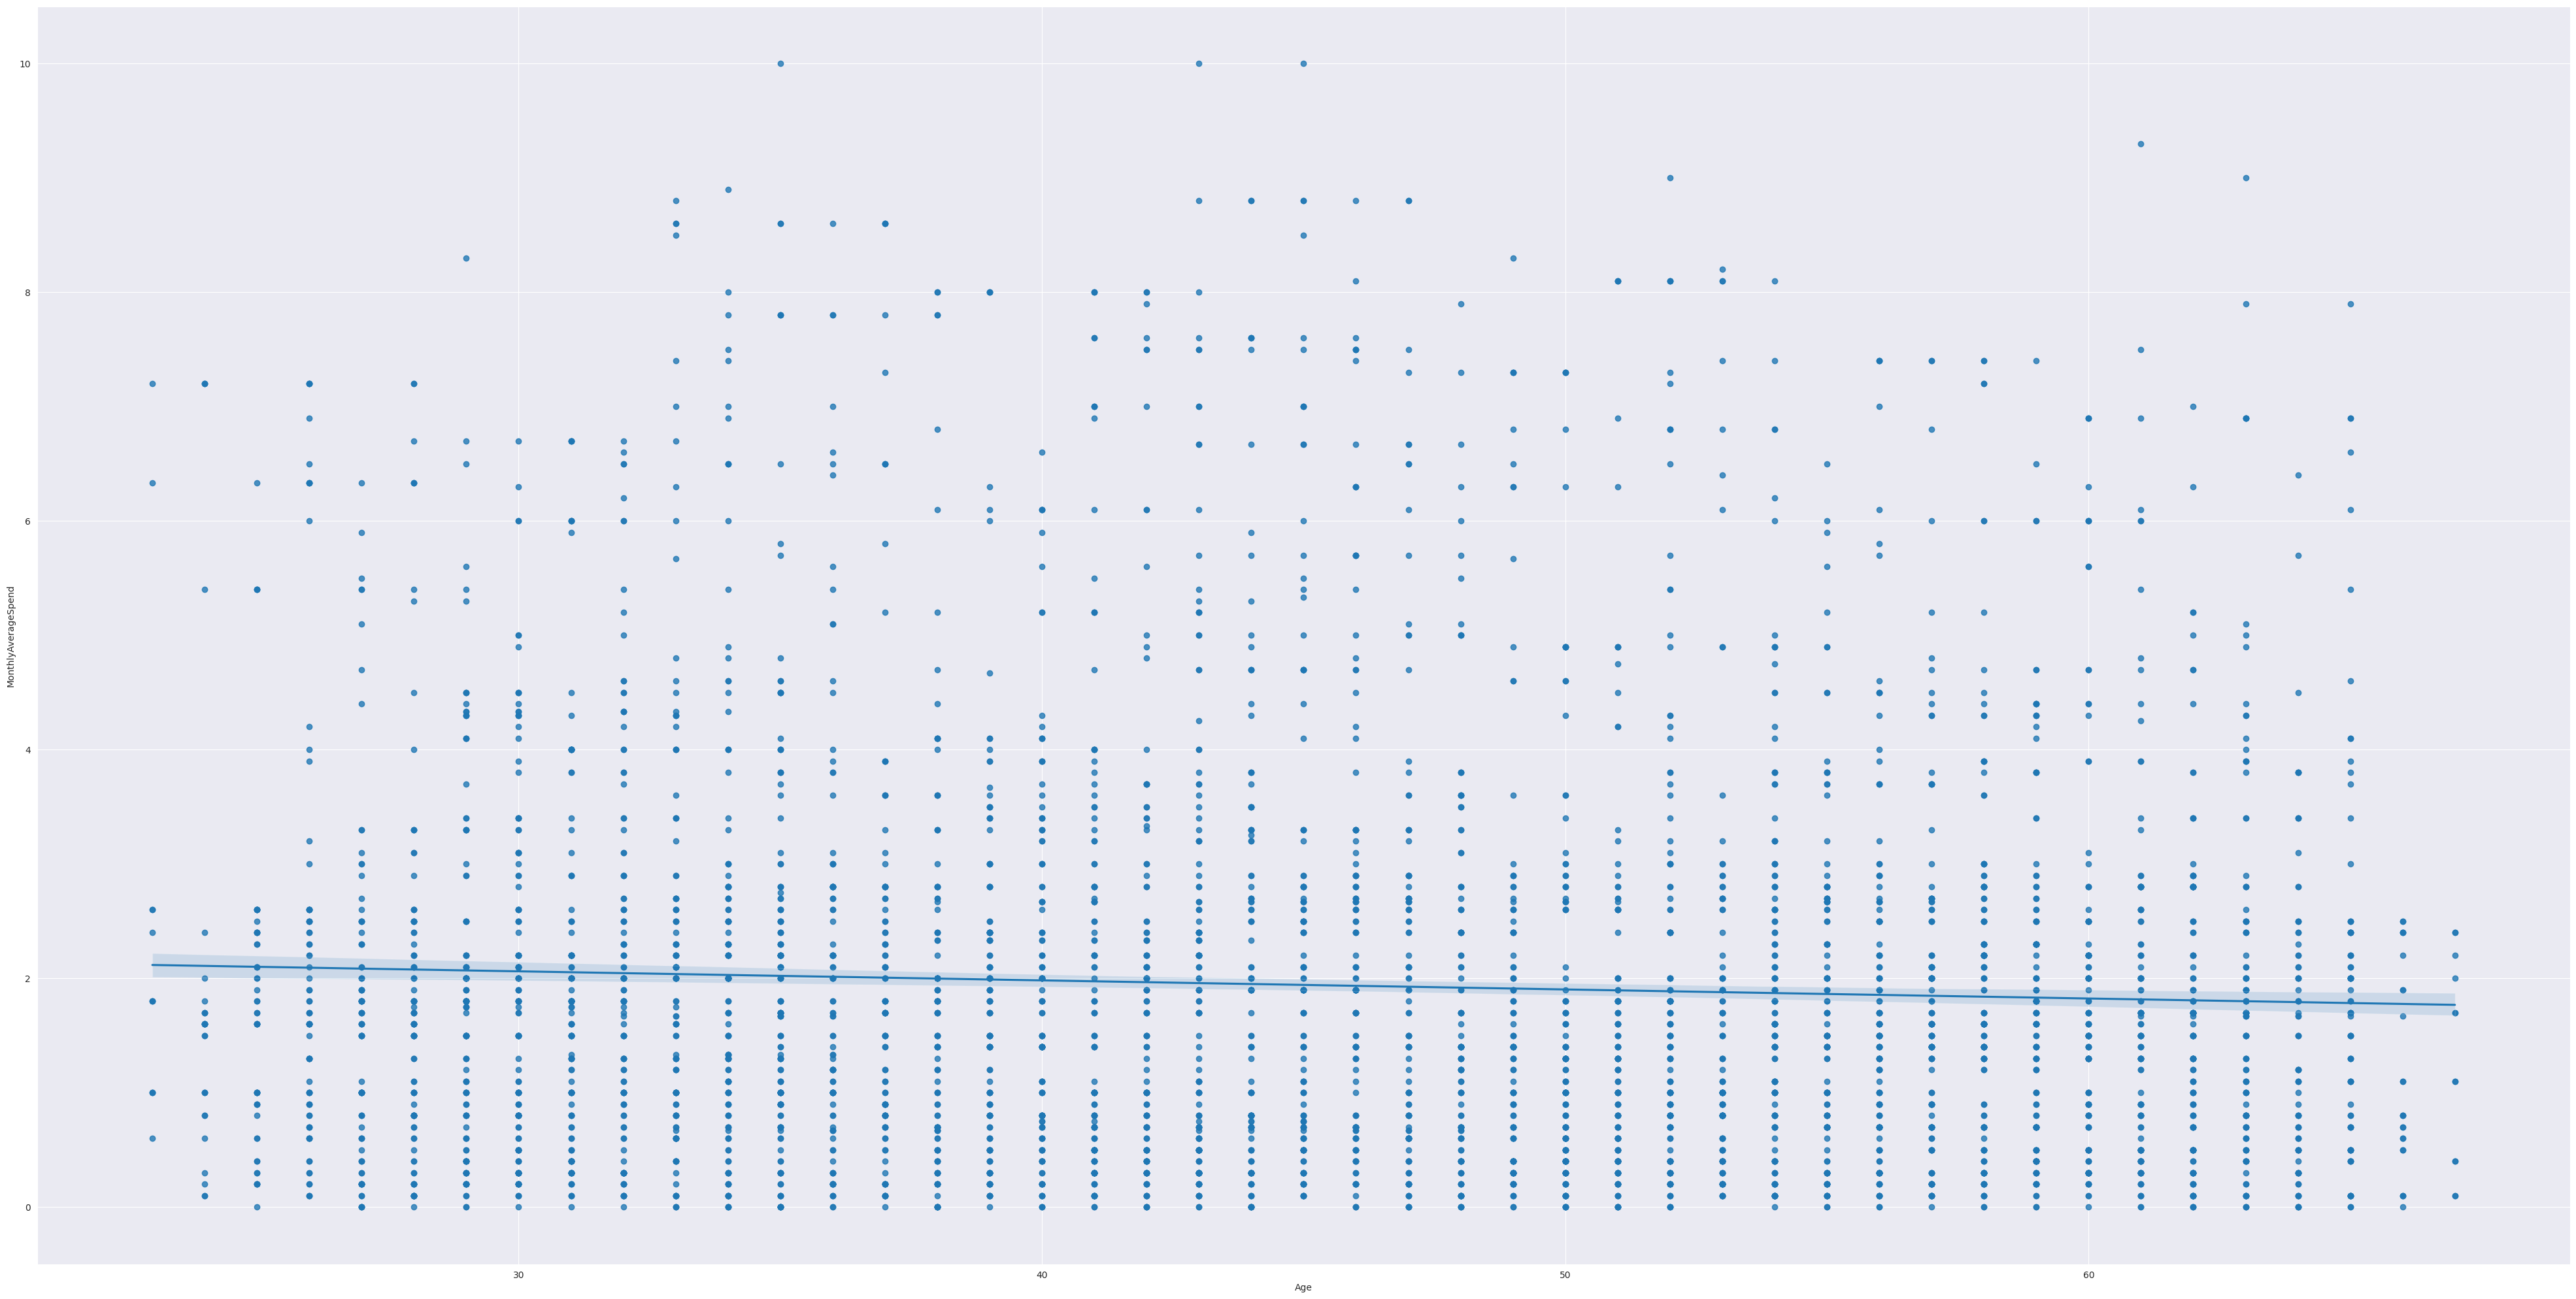

In [110]:
#Age vs MonthlyAverageSpend
figure = plt.figure(figsize=(50,25))

ax = sns.regplot(x='Age',y='MonthlyAverageSpend', data=dataframe_merge) # regression plot - scatter plot with a regression line
#Age does not have any relationship with spend.

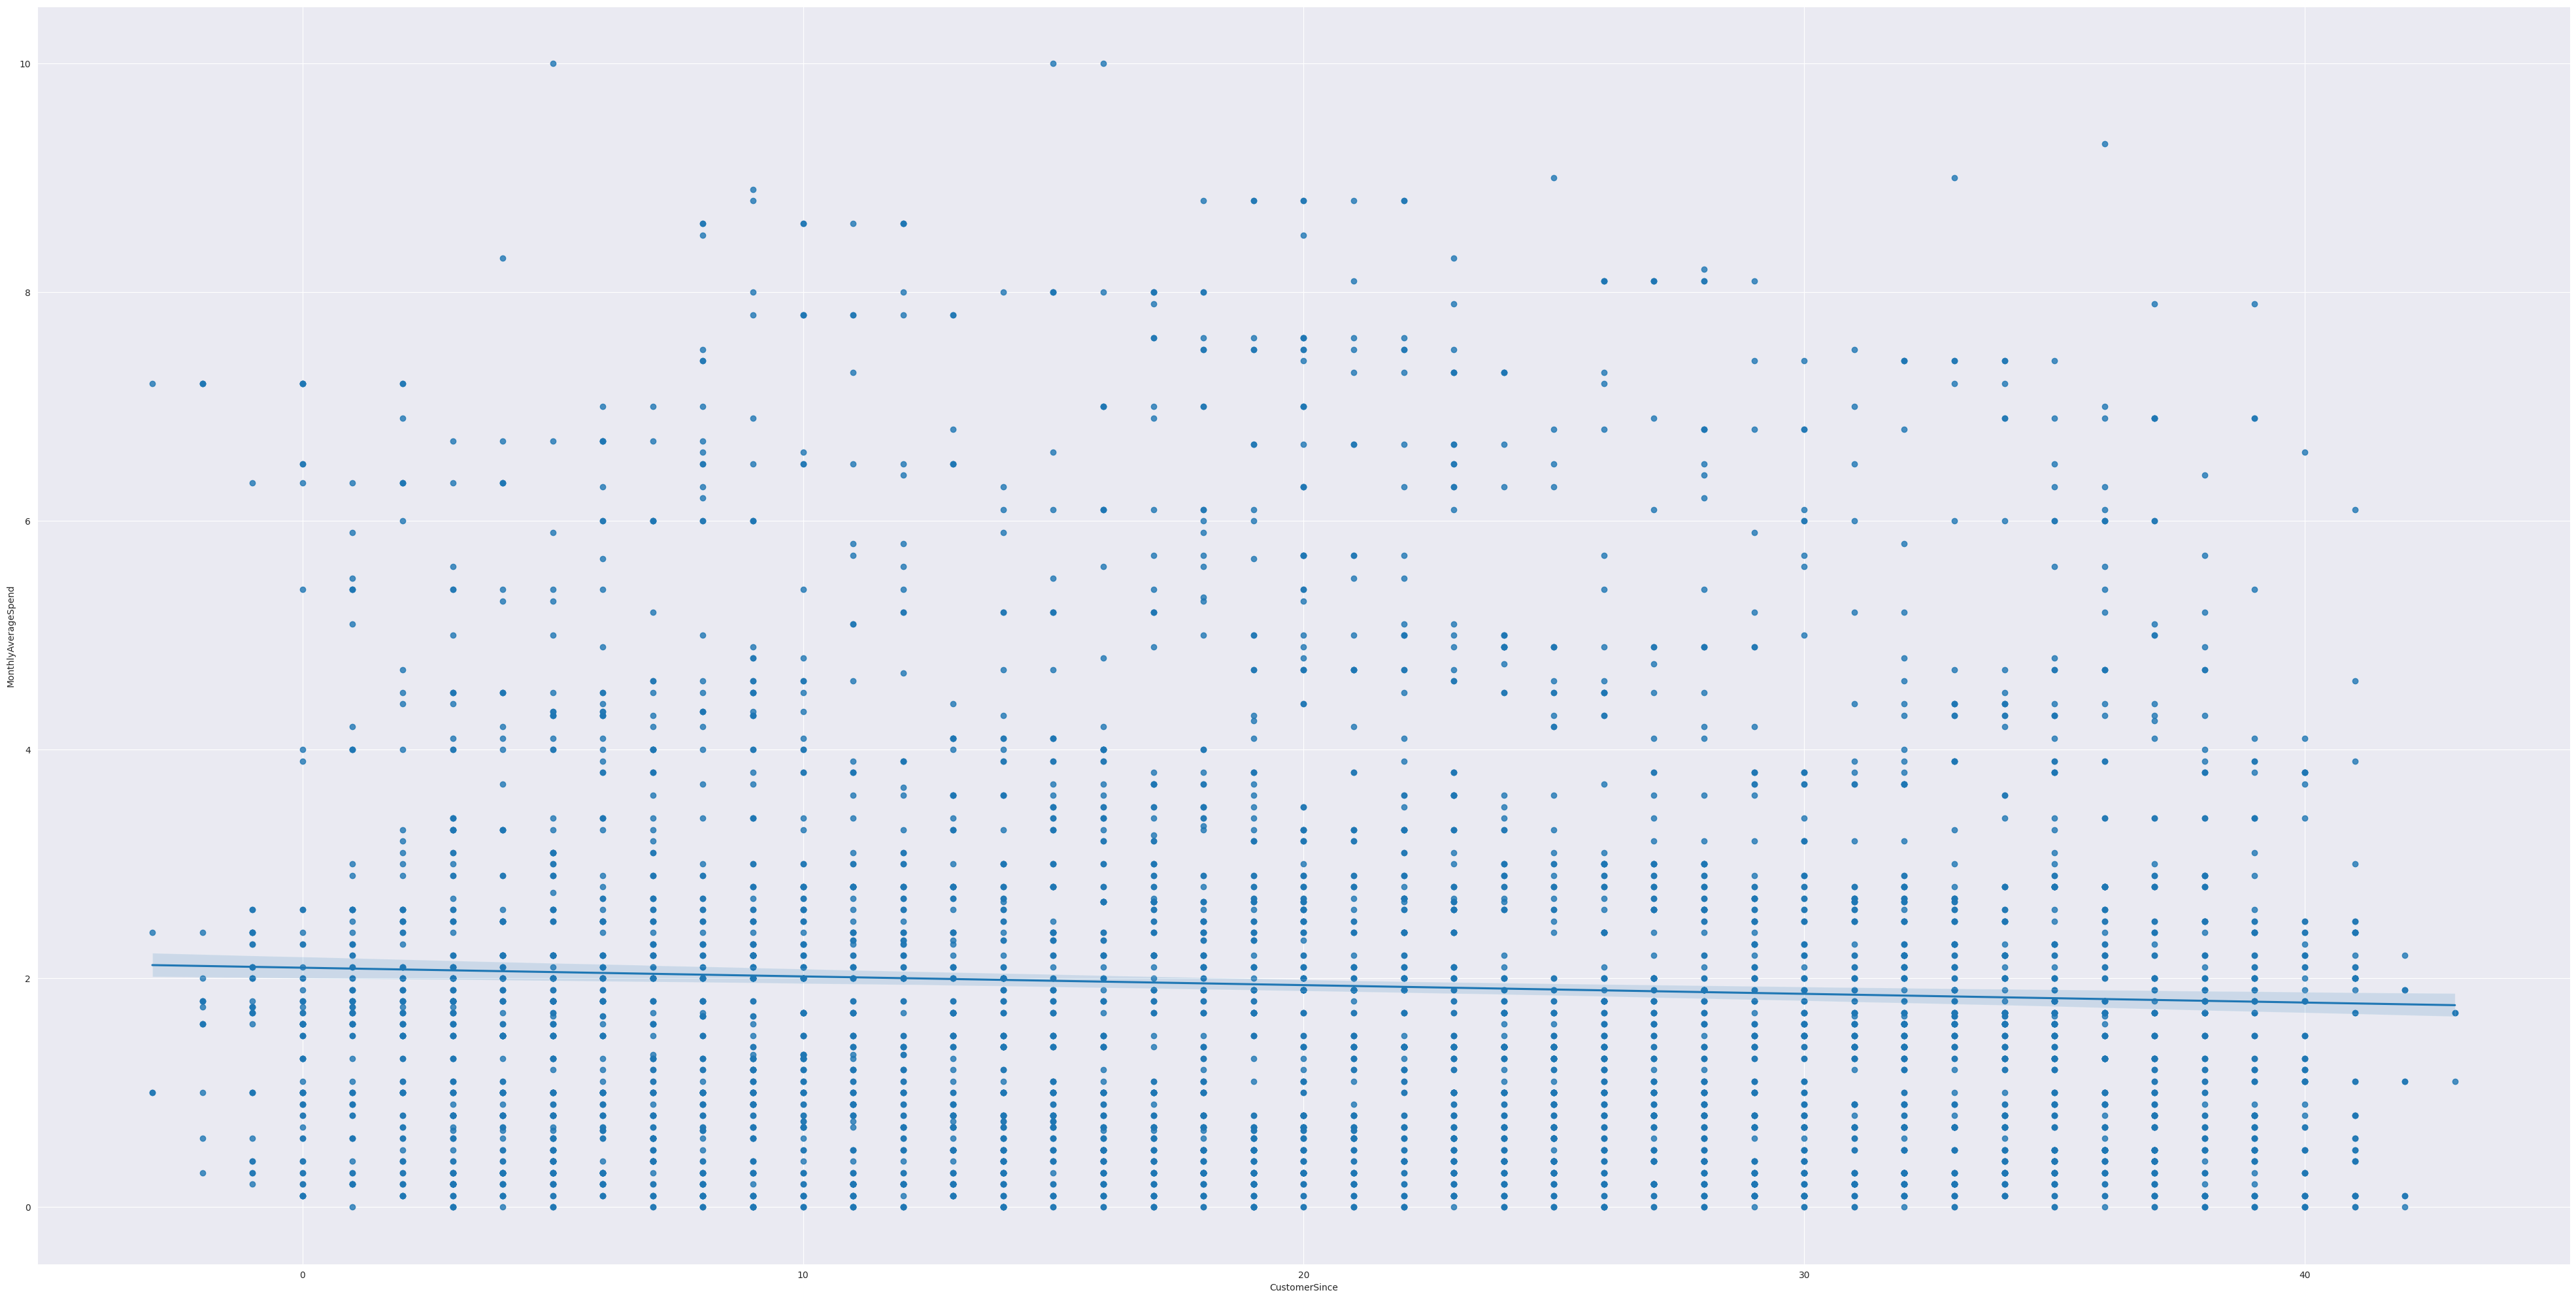

In [111]:
#CustomerSince vs MonthlyAverageSpend
figure = plt.figure(figsize=(50,25))
ax = sns.regplot(x='CustomerSince',y='MonthlyAverageSpend', data=dataframe_merge) # regression plot - scatter plot with a regression line
#Customer period is not dependent on spend

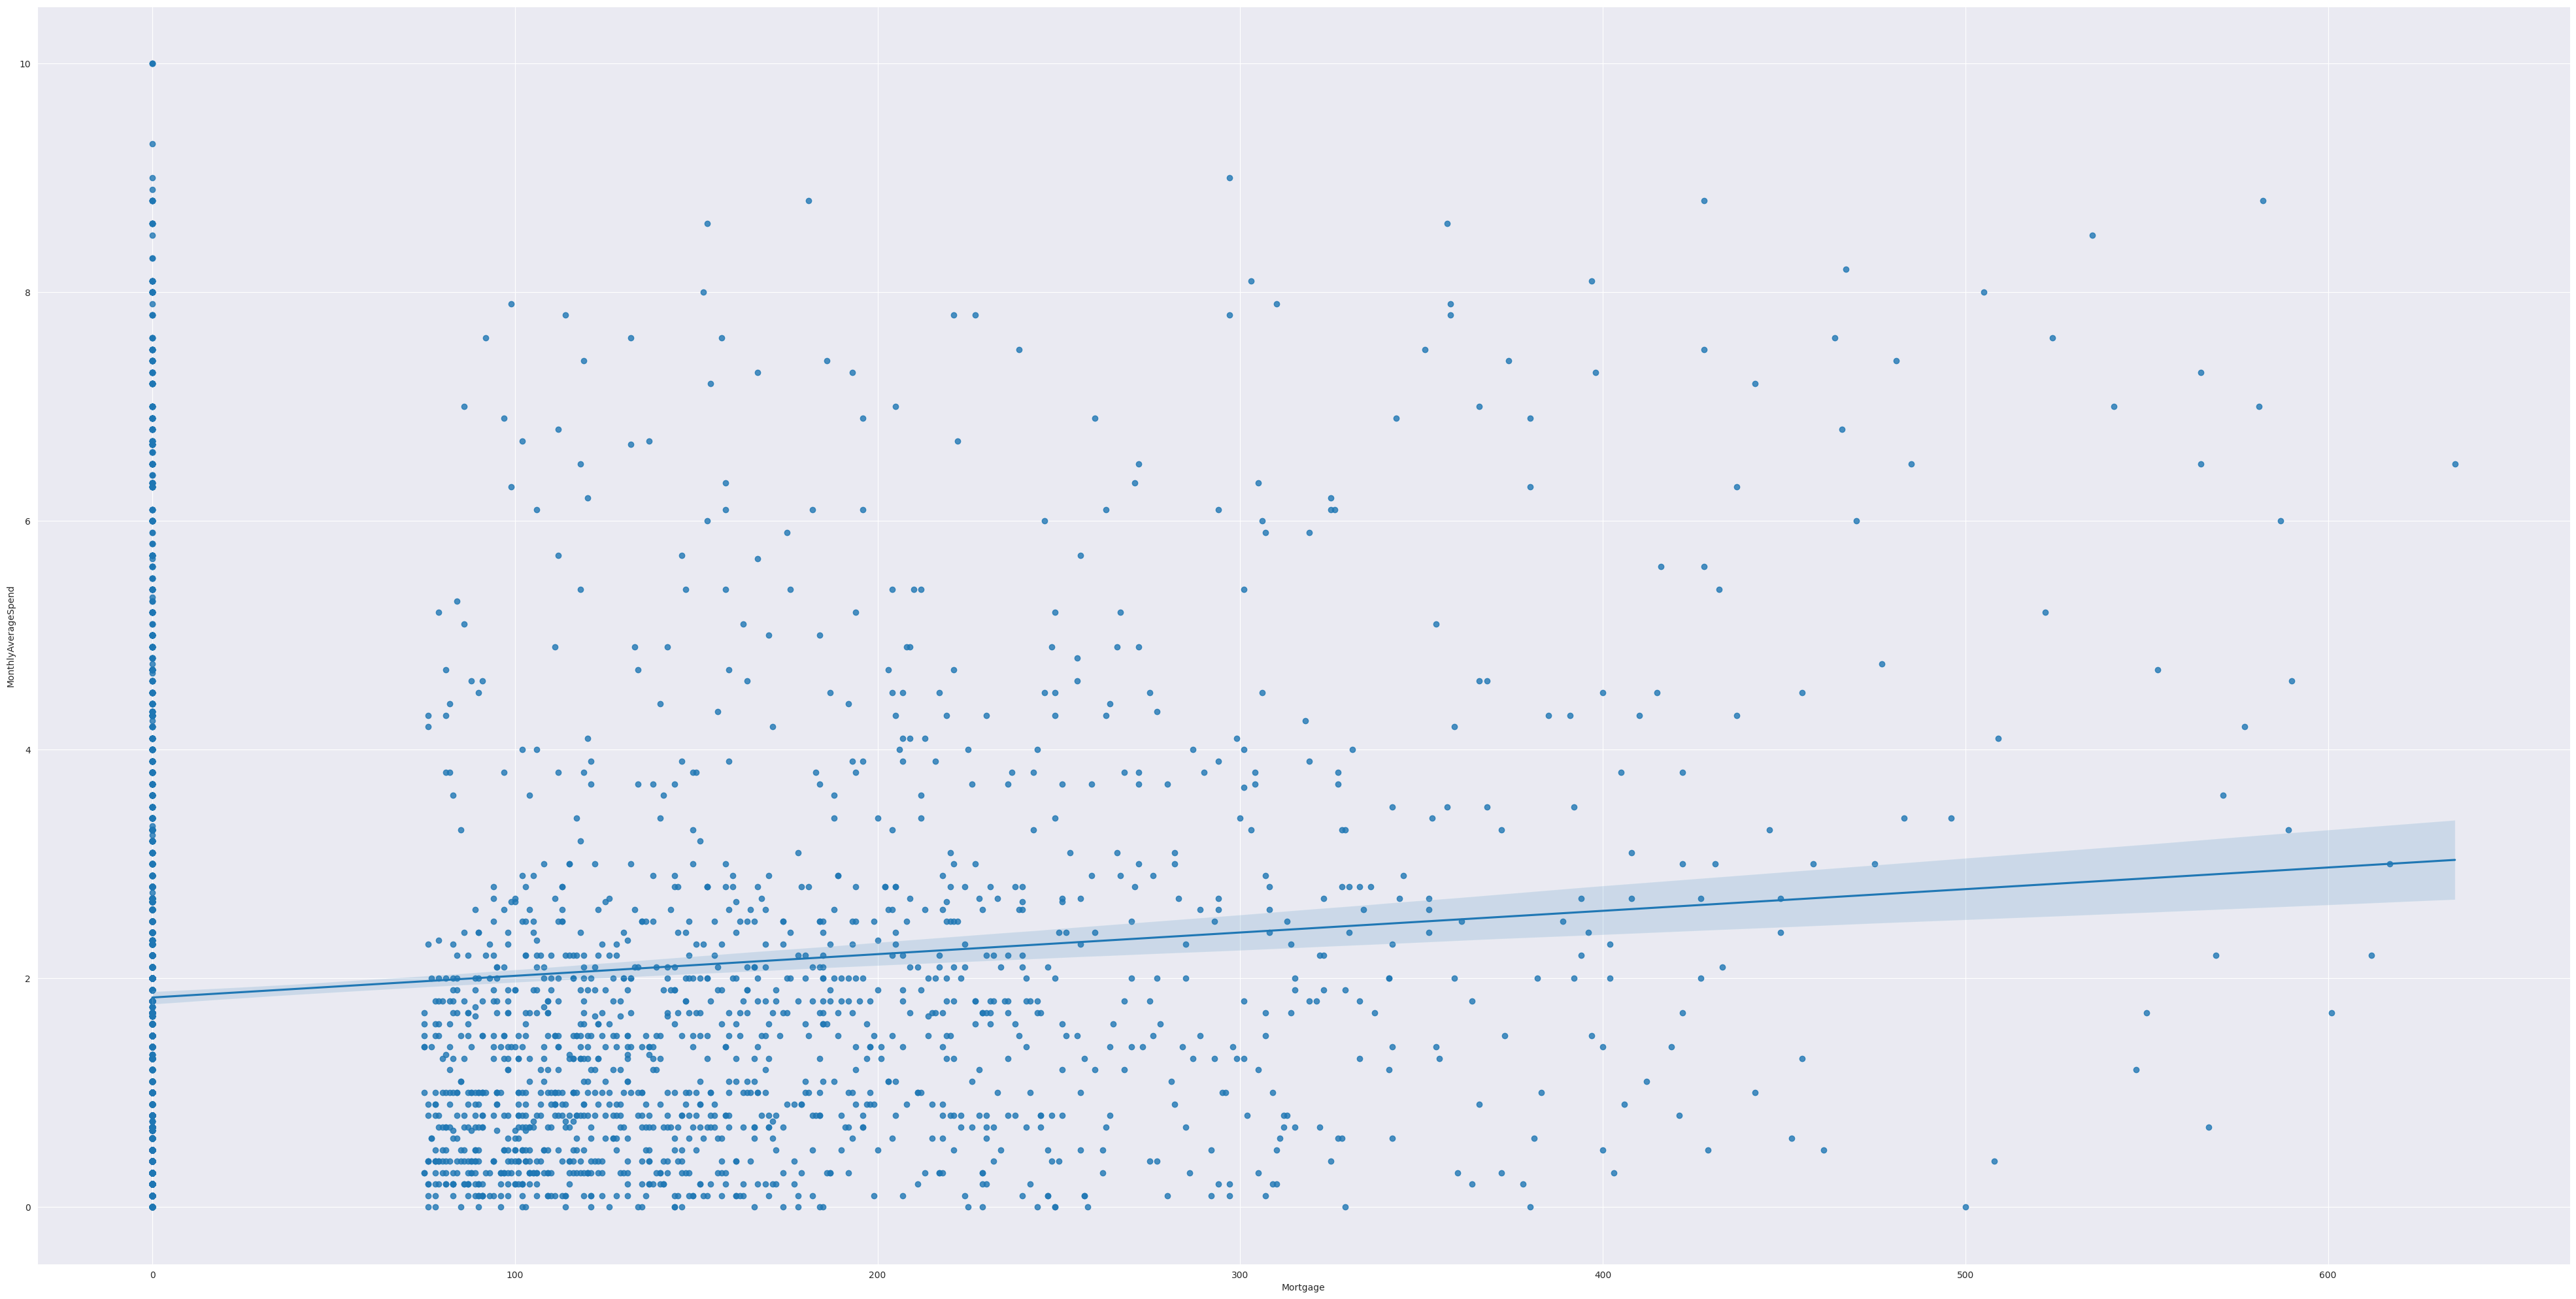

In [112]:
#Mortgage vs MonthlyAverageSpend
figure = plt.figure(figsize=(50,25))
ax = sns.regplot(x='Mortgage',y='MonthlyAverageSpend', data=dataframe_merge) # regression plot - scatter plot with a regression line
#Mortgage value has slight relationship with spend

<Axes: >

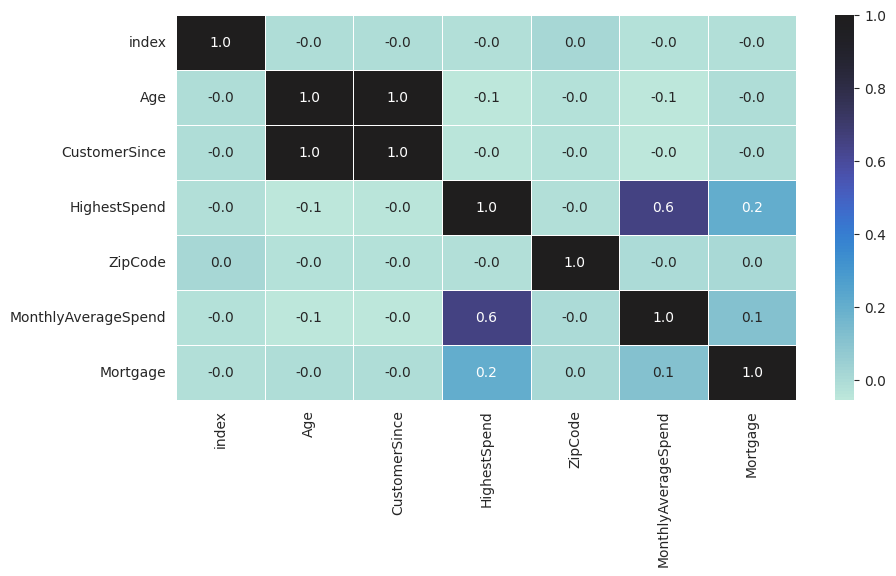

In [113]:
#Correlation among pairs of continuous variables
plt.figure(figsize=(10,5))
sns.heatmap(dataframe_merge.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
#Age and customer since has correlation as 1. Any one can be used for the model.

#Highest spend has large correlation with monthly average spend
#Mortage and highest spend has little correlation
#Rest of the variables does not have any relation

**multivariate analysis**

<Axes: xlabel='Level', ylabel='MonthlyAverageSpend'>

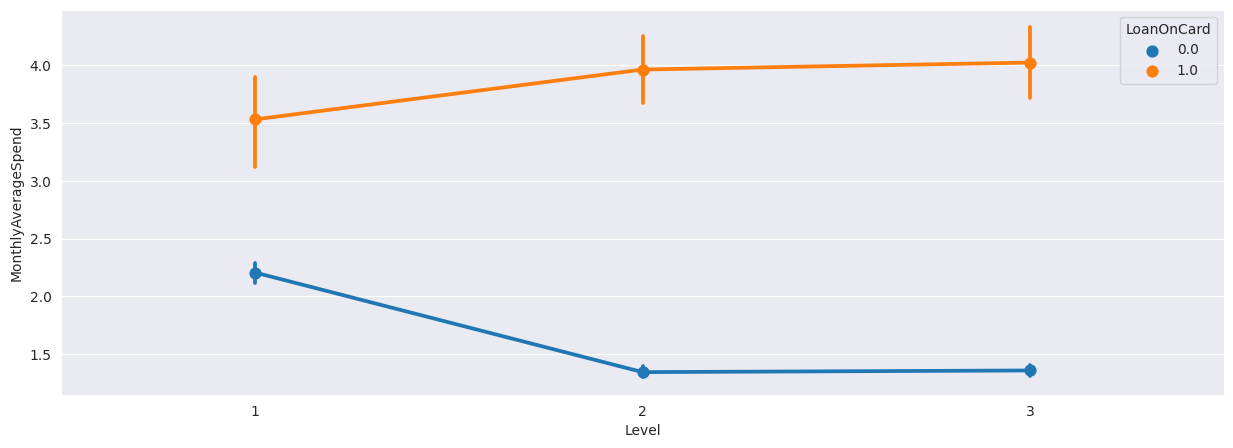

In [114]:
#"Monthly average spend" vs "loan" vs "level"
plt.figure(figsize=(15,5))
sns.pointplot(x="Level", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=dataframe_merge)
#We can clearly see that loan holder spend more money.Particulary the spend is more on level 2 and 3

<Axes: xlabel='InternetBanking', ylabel='MonthlyAverageSpend'>

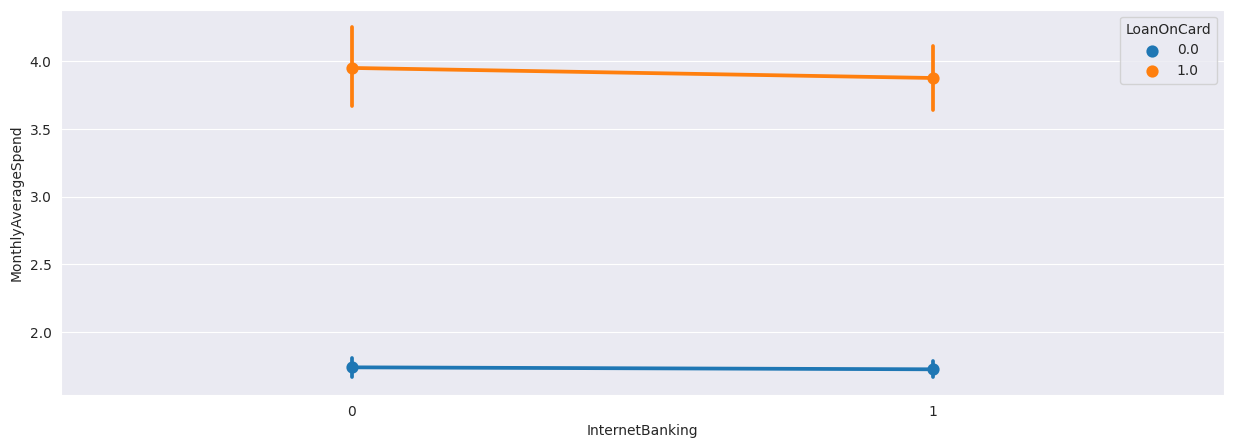

In [115]:
#"MonthlyAverageSpend" vs "Loan" vs "InternetBanking"
plt.figure(figsize=(15,5))
sns.pointplot(x="InternetBanking", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=dataframe_merge)
#There is no fluctuation due to internet banking

<Axes: xlabel='CreditCard', ylabel='MonthlyAverageSpend'>

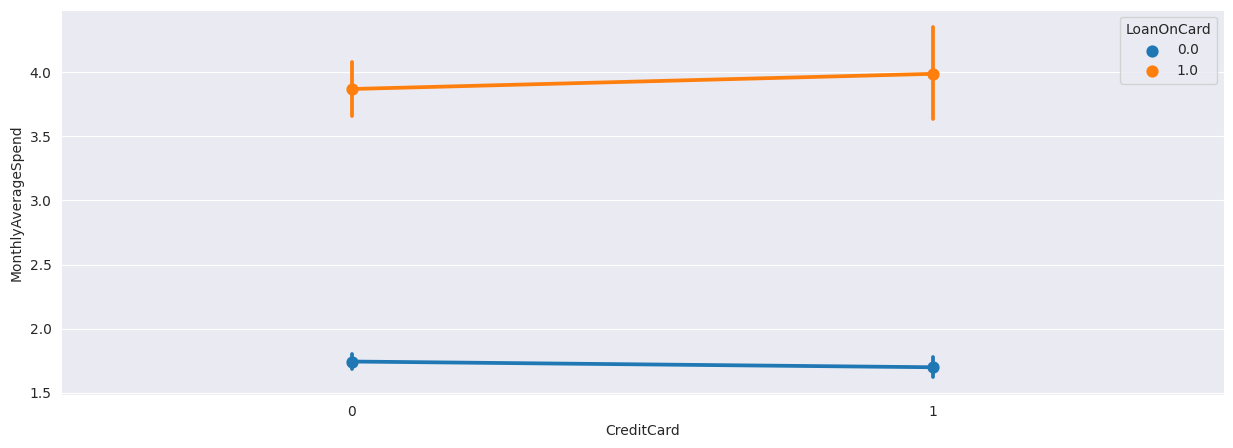

In [116]:
#"MonthlyAverageSpend" vs "Loan" vs "CreditCard"
plt.figure(figsize=(15,5))
sns.pointplot(x="CreditCard", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=dataframe_merge)
#Spend is slightly more for credit card holders

<Axes: xlabel='FixedDepositAccount', ylabel='MonthlyAverageSpend'>

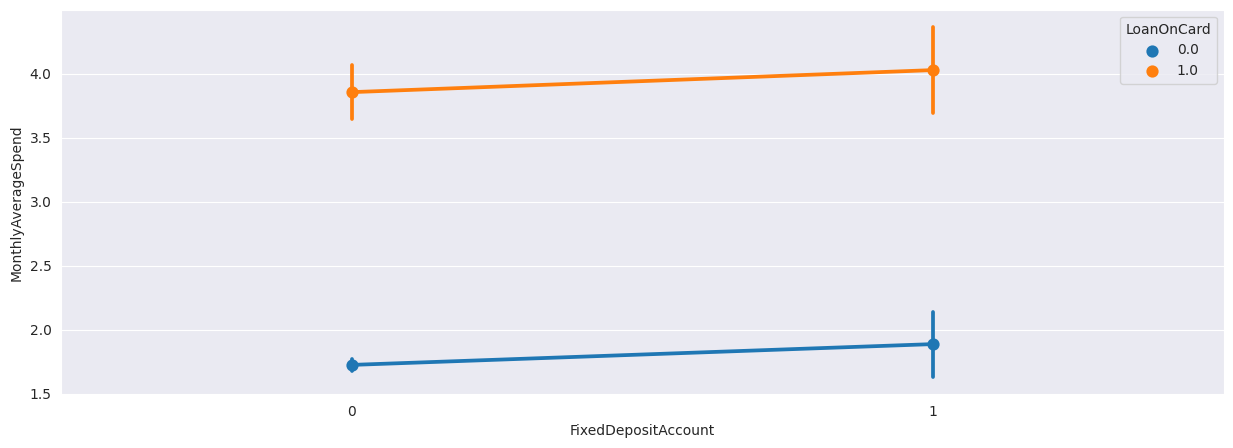

In [117]:
#"MonthlyAverageSpend" vs "Loan" vs "FixedDepositAccount"
plt.figure(figsize=(15,5))
sns.pointplot(x="FixedDepositAccount", y="MonthlyAverageSpend", hue = 'LoanOnCard',  data=dataframe_merge)
#Spend is slightly more for FD Account holders

In [118]:
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

In [119]:
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(dataframe_merge[c],25),np.percentile(dataframe_merge[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in dataframe_merge[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    #taking mean of a column without considering outliers
    dataframe_merge_include = dataframe_merge.loc[(dataframe_merge[c] >= lower) & (dataframe_merge[c] <= upper)]
    mean=int(dataframe_merge_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    dataframe_merge[c]=np.where(dataframe_merge[c]>upper,mean,dataframe_merge[c])
    dataframe_merge[c]=np.where(dataframe_merge[c]<lower,mean,dataframe_merge[c])
    Outliers=[i for i in dataframe_merge[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96


 Mean of HighestSpend is 71


 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324


 Mean of MonthlyAverageSpend is 1


 Total Number of outliers in MonthlyAverageSpend After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291


 Mean of Mortgage is 38


 Total Number of outliers in Mortgage After Imputing : 0




In [120]:
X = dataframe_merge.drop(columns='LoanOnCard')
y = dataframe_merge['LoanOnCard'] # targetdataframe_merge

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

**logistic regression**

In [122]:
Linear_Regression_model = LogisticRegression()
Linear_Regression_model.fit(X_train, y_train)
Linear_Regression_model_pred = Linear_Regression_model.predict(X_test)

print('Accuracy on Training data:',Linear_Regression_model.score(X_train, y_train) )
print('Accuracy on Test data:',Linear_Regression_model.score(X_test, y_test) )
#94% accuracy on training set and 93% accuracy on test set.
#Here training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good

Accuracy on Training data: 0.9360298336201951
Accuracy on Test data: 0.9497991967871486


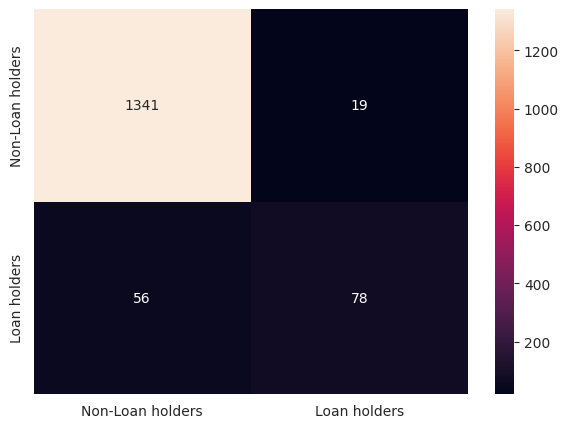

In [123]:
cm = confusion_matrix(y_test, Linear_Regression_model_pred, labels=[0, 1])

dataframe_merge_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(dataframe_merge_cm, annot=True ,fmt='g')
plt.show()

In [124]:
print("classification  Matrix:\n",classification_report(y_test,Linear_Regression_model_pred))
#Here you can see model is poor in predicting class 1 compared to class 0
#Accuracy is good but in this case we need to look on recall value
#Here Recall tells that only 48% class 1 is predicted correctly from actual values
#We dont have enough sample of class 1 to train the model.

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1360
         1.0       0.80      0.58      0.68       134

    accuracy                           0.95      1494
   macro avg       0.88      0.78      0.82      1494
weighted avg       0.95      0.95      0.95      1494



**Naive Bayes Model**

In [125]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print('Accuracy on Training data:',nb_model.score(X_train, y_train) )
print('Accuracy on Test data:',nb_model.score(X_test, y_test) )

Accuracy on Training data: 0.9082042455536431
Accuracy on Test data: 0.9082998661311914


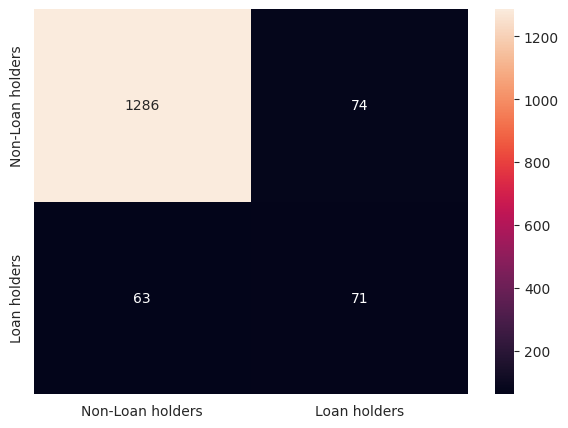

In [126]:
cm = confusion_matrix(y_test, nb_pred, labels=[0, 1])

dataframe_merge_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(dataframe_merge_cm, annot=True ,fmt='g')
plt.show()

In [127]:
print("classification  Matrix:\n",classification_report(y_test,nb_pred))
#Recall value is good for both the classes
#Recall value for class 1 is less in naive bayes model compared to logistic regression.

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1360
         1.0       0.49      0.53      0.51       134

    accuracy                           0.91      1494
   macro avg       0.72      0.74      0.73      1494
weighted avg       0.91      0.91      0.91      1494



**Random Forest Model**

In [128]:
randomforest_model = RandomForestClassifier()
randomforest_model.fit(X_train, y_train)
rf_pred = randomforest_model.predict(X_test)

print('Accuracy on Training data:',randomforest_model.score(X_train, y_train) )
print('Accuracy on Test data:',randomforest_model.score(X_test, y_test) )

Accuracy on Training data: 1.0
Accuracy on Test data: 0.9825970548862115


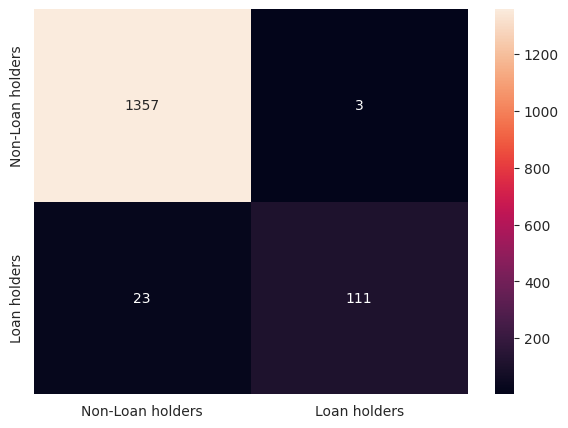

In [129]:
cm = confusion_matrix(y_test, rf_pred, labels=[0, 1])

dataframe_merge_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(dataframe_merge_cm, annot=True ,fmt='g')
plt.show()

In [130]:
print("classification  Matrix:\n",classification_report(y_test,rf_pred))
#could be a chance of overfitting with this model.

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1360
         1.0       0.97      0.83      0.90       134

    accuracy                           0.98      1494
   macro avg       0.98      0.91      0.94      1494
weighted avg       0.98      0.98      0.98      1494



In [131]:
Linear_Regression_model=LogisticRegression()
randomforest_model=RandomForestClassifier()
GN_model=GaussianNB()

LR: 0.916265 (0.015659)
RF: 0.980723 (0.004036)
NB: 0.906426 (0.010364)


[Text(1, 0, 'LR'), Text(2, 0, 'RF'), Text(3, 0, 'NB')]

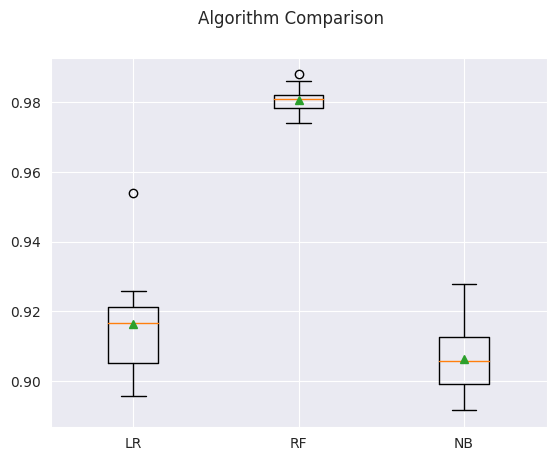

In [132]:
# prepare models
models = []
models.append(('LR', Linear_Regression_model))
models.append(('RF', randomforest_model))
models.append(('NB', GN_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.StratifiedKFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
box = plt.boxplot(results, showmeans = True)
colors = ['khaki', 'teal', 'cornflowerblue']
ax.set_xticklabels(names)

The Naive Bayes model was selected as our final model because it exhibits good performance in both training and testing datasets and is unaffected by overfitting.
Moreover, Naive Bayes shows less deviation.

suggesting that data for both classifications be gathered equally.
Few customers do not have credit cards, but those that do have debts on their cards. This data blunder can be avoided.
